In [2]:
#some generic imports

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special


In [2]:
pd.__version__

'1.3.5'

### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the **index**. The basic method to create a Series is to call:

```Python
s = pd.Series(data, index=index)
```

Here, `data` can be many different things:

 - a Python dict
 - a python list
 - an ndarray
 - a scalar value (like 5)

The passed index is a list of axis labels. Thus, this separates into a few cases depending on what **data** is:

##### from list

In [3]:
a = pd.Series(['1','2','3'], range(3))
a

0    1
1    2
2    3
dtype: object

##### from Numpy arrays

In [6]:
s = pd.Series(np.random.randn(5), index=["a", "a", "c", "d", "e"]) #note the non-unique indices
s

a   -1.207815
a    1.723647
c   -1.290780
d   -0.844811
e    0.047745
dtype: float64

In [7]:
s.index

Index(['a', 'a', 'c', 'd', 'e'], dtype='object')

pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time.

##### from dictionary

In [8]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

`Series` index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and pandas version >= 0.23.

If you’re using Python < 3.6 or pandas < 0.23, and an index is not passed, the `Series` index will be the lexically ordered list of dict keys.

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [10]:
pd.Series(d, index = list('cab'))

c    2
a    0
b    1
dtype: int64

##### from scalar value

In [12]:
#if data is scalar (here 5), index must be provided
data = pd.Series(5, index = ['a','b','c','d']) 
data

a    5
b    5
c    5
d    5
dtype: int64

#### Series is ndarray-like

Series acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [15]:
s

a   -1.207815
a    1.723647
c   -1.290780
d   -0.844811
e    0.047745
dtype: float64

In [16]:
s[0]

-1.2078146616033723

In [17]:
s[:3]

a   -1.207815
a    1.723647
c   -1.290780
dtype: float64

In [18]:
s[s > s.median()]

a    1.723647
e    0.047745
dtype: float64

In [19]:
s[[4, 3, 1]]

e    0.047745
d   -0.844811
a    1.723647
dtype: float64

In [20]:
np.exp(s)


a    0.298850
a    5.604933
c    0.275056
d    0.429639
e    1.048904
dtype: float64

If you need the actual array backing a `Series`, use `Series.array`.

In [21]:
s.array

<PandasArray>
[-1.2078146616033723,  1.7236471766350312, -1.2907800149176076,
 -0.8448107009094705, 0.04774535625910334]
Length: 5, dtype: float64

Accessing the array like above can be useful when you need to do some operation without the index (to disable automatic alignment, for example)

While Series is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()`.

In [25]:
s.to_numpy()

array([-1.20781466,  1.72364718, -1.29078001, -0.8448107 ,  0.04774536])

##### Attribute access

You may access an index on a `Series` or column on a `DataFrame` directly as an attribute:

In [27]:
s.d

-0.8448107009094705

In [31]:
axa = pd.Series([1,2], index = ['foo','bar'])
axa.foo

1

$\color{blue}{Careful!} $



 - You can use this access only if the index element is a valid Python identifier, e.g. `s.1` is not allowed.

 - The attribute will not be available if it conflicts with an existing method name, e.g. `s.min` is not allowed, but `s['min']` is possible.

 - Similarly, the attribute will not be available if it conflicts with any of the following list: `index`, `major_axis`, `minor_axis`, `items`.

 - In any of these cases, standard indexing will still work, e.g. `s['1']`, `s['min']`, and `s['index']` will access the corresponding element or column.


##### Series is dict-like

A Series is like a fixed-size dict in that you can get and set values by index label:

In [32]:
s['a']

a   -1.207815
a    1.723647
dtype: float64

In [34]:
s['f'] = 0.1234
s

a   -1.207815
a    1.723647
c   -1.290780
d   -0.844811
e    0.047745
f    0.123400
dtype: float64

In [35]:
"f" in s, "g" in s

(True, False)

Using the `get` method, a missing label will return `None` or specified default:

In [37]:
s.get("g")

In [38]:
s.get("g", np.nan)

nan

In [63]:
s.keys()

Index(['a', 'a', 'c', 'd', 'e', 'f'], dtype='object')

In [65]:
s.values

array([-1.20781466,  1.72364718, -1.29078001, -0.8448107 ,  0.04774536,
        0.1234    ])

##### Iteration over Series

In [66]:
for i in s:
    print(i)

-1.2078146616033723
1.7236471766350312
-1.2907800149176076
-0.8448107009094705
0.04774535625910334
0.1234


##### Vectorized operations and label alignment with Series

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [39]:
s[1:] + s[:-1]

a    0.515833
a    3.447294
c   -2.581560
d   -1.689621
e    0.095491
f         NaN
dtype: float64

The result of an operation between unaligned Series will have the **union** of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing `NaN`. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research.

##### `name` attribute


In [41]:
s.name = 'Foo'
s.name

'Foo'

You can rename a Series with the `pandas.Series.rename()` method.

In [42]:
s1 = s.rename('Bar')
s1.name

'Bar'

Note that `s1` and `s` are different objects.

##### `Series.to_frame()` method

In [43]:
s.to_frame()

,Foo
a,-1.207815
a,1.723647
c,-1.290780
d,-0.844811
e,0.047745
f,0.123400


##### `Series.astype()` method

In [44]:
s2= pd.Series(range(1,4), index = list('abc') )
s2

a    1
b    2
c    3
dtype: int64

In [45]:
s2.astype('float')

a    1.0
b    2.0
c    3.0
dtype: float64

### DataFrame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. Like Series, DataFrame accepts many different kinds of input:

 - Dict of 1D ndarrays, lists, dicts, or Series

 - 2-D numpy.ndarray

 - Structured or record ndarray

 - A Series

 - Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

##### From NumPy arrays


In [67]:
np.random.seed(123)
data = np.random.randn(3,4)

data = pd.DataFrame(data, columns = "P Q R S".split())
data

,P,Q,R,S
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709


##### From dict of Series or dicts

In [48]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [49]:
pd.DataFrame(d, index=["d", "b", "a"]) #note the absence of 'c' index and its respective elements

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [50]:
pd.DataFrame(d, columns=["two", "three"]) #notice the absence of 'one' column and presence of 'three' column 

,two,three
a,1.0,NaN
b,2.0,NaN
c,3.0,NaN
d,4.0,NaN


In [51]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [52]:
df.columns

Index(['one', 'two'], dtype='object')

##### From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [53]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [54]:
pd.DataFrame(d, index = list('abcd'))

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


##### From structured or record array

This case is handled identically to a dict of arrays.

In [56]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])

data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [57]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [58]:
pd.DataFrame(data, columns=list('CAB'))

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


#### From a list of dicts

In [59]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [60]:

pd.DataFrame(data2, index=["first", "second"], columns = ["b", "c"])

,b,c
first,2,NaN
second,10,20.0


##### From dictionary with keys as dictionaries

In [68]:
age = {'sam': 33, 'mac':37}
address = {'sam':100, 'mac':101}
df = pd.DataFrame({'a':age, 'b':address})
df

,a,b
sam,33,100
mac,37,101


##### From a dict of tuples

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

In [61]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

#####  From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

In [62]:
s3 = pd.Series([2,3,4], index = list('abc'))
s3.name = 'Series'

pd.DataFrame(s3)

,Series
a,2
b,3
c,4


for dataframe 

You can use attribute access to modify an existing element of a Series or column of a DataFrame, but be careful; if you try to use attribute access to create a new column, it creates a new attribute rather than a new column. In 0.21.0 and later, this will raise a UserWarning:

#### Alternate Constructors

`DataFrame.from_dict`

`DataFrame.from_dict` takes a dict of dicts or a dict of array-like sequences and returns a DataFrame. It operates like the `DataFrame` constructor except for the `orient` parameter which is `columns` by default, but which can be set to `index` in order to use the dict keys as row labels.

In [69]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [70]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)

,one,two,three
A,1,2,3
B,4,5,6


`DataFrame.from_records`

`DataFrame.from_records` takes a list of tuples or an ndarray with structured dtype. It works analogously to the normal `DataFrame` constructor, except that the resulting `DataFrame` index may be a specific field of the structured dtype. For example:

In [71]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [72]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


#### Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [74]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
df = pd.DataFrame(d)

df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [75]:
df["three"] = df["one"] * df["two"]

In [76]:
df["flag"] = df["one"] > 2
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict:

In [79]:
del df["two"]
three = df.pop("three")

In [80]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [81]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

When inserting a scalar value, it will naturally be propagated to fill the column:

In [82]:
df["foo"] = "bar"

In [83]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [84]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The `insert` function is available to insert at a particular location in the columns:

In [85]:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


#### `assign` method

`assign` always returns a copy of the data, leaving the original DataFrame untouched.

In [3]:
df = pd.DataFrame({'a': list('abc'), 'b': range(1,4)})
df = df.assign(c = [2,5,4])
df

,a,b,c
0,a,1,2
1,b,2,5
2,c,3,4


In [4]:
df.assign(d = lambda x: x.b * x.c)

,a,b,c,d
0,a,1,2,2
1,b,2,5,10
2,c,3,4,12


 `assign()` method allows you to easily create new columns that are potentially derived from existing columns.

In [6]:
iris = pd.read_csv("data/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:

iris.assign(sepal_ratio=iris["sepal_width"] / iris["sepal_length"]).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [10]:
iris.assign(sepal_ratio=lambda x: (x["sepal_width"] / x["sepal_length"])).head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using `assign` in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='SepalRatio', ylabel='PetalRatio'>

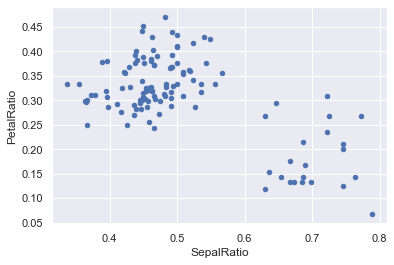

In [11]:
(
    iris.query("sepal_length > 5")
    .assign(
        SepalRatio=lambda x: x.sepal_width / x.sepal_length,
        PetalRatio=lambda x: x.petal_width / x.petal_length,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for `assign` is simply `**kwargs`. The keys are the column names for the new fields, and the values 
are either a value to be inserted (for example, a `Series` or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original `DataFrame` is returned, with the new values inserted.

Starting with Python 3.6 the order of `**kwargs` is preserved. This allows for dependent assignment, where an expression later in `**kwargs` can refer to a column created earlier in the same `assign()`.

In [12]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


#### Data alignment and arithmatic

Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels)**. Again, the resulting object will have the union of the column and row labels.

In [21]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

,A,B,C,D
0,0.010117,-1.398327,-1.338030,NaN
1,1.126774,1.529720,0.735906,NaN
2,-0.536913,-0.456562,-0.315493,NaN
3,-0.989671,-1.782462,1.968493,NaN
4,-2.006378,-1.935469,-0.748395,NaN
5,0.313307,-1.453482,1.300325,NaN
6,-1.027712,1.460349,-0.019346,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series **index** on the DataFrame **columns**, thus broadcasting row-wise. For example:

In [22]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.243020,1.871904,0.924857,1.128816
2,-0.920476,-0.662194,-0.423868,-0.299630
3,-0.991800,-0.258727,1.741475,-2.231040
4,-1.082114,0.278594,-0.008730,-1.296439
5,-0.524490,0.098848,-0.319527,0.882252
6,0.192134,1.564052,0.668209,2.014945
7,-0.924653,1.432798,0.460930,1.784230
8,0.050028,-0.256550,-0.478298,0.677983
9,1.094965,3.100106,-0.311385,-1.523975


Operations with scalars are just as you would expect:

In [24]:
(df * 5 + 2).head(3)

,A,B,C,D
0,4.287800,-4.463605,-0.473655,2.947937
1,-1.927301,4.895917,4.150629,8.592015
2,-0.314582,-7.774575,-2.592997,1.449785


Boolean operators work as well:

In [25]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)

df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [26]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [27]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [28]:
~df1

,a,b
0,False,True
1,True,False
2,False,False


To transpose, access the `T` attribute (also the `transpose` function), similar to an ndarray:

In [30]:
df[:5].T

,0,1,2,3,4
A,0.457560,-0.785460,-0.462916,-0.534240,-0.624554
B,-1.292721,0.579183,-1.954915,-1.551448,-1.014127
C,-0.494731,0.430126,-0.918599,1.246744,-0.503461
D,0.189587,1.318403,-0.110043,-2.041453,-1.106851


##### DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on Series and DataFrame, assuming the data within are numeric:

In [31]:
np.exp(df).head(2)

,A,B,C,D
0,1.580213,0.274523,0.609735,1.208751
1,0.455910,1.784580,1.537451,3.737448


In [33]:
np.asarray(df)[:3]

array([[ 0.45755994, -1.292721  , -0.49473094,  0.18958736],
       [-0.78546015,  0.57918334,  0.43012576,  1.31840299],
       [-0.46291632, -1.95491506, -0.91859937, -0.11004302]])

In [35]:
df[:3]

,A,B,C,D
0,0.457560,-1.292721,-0.494731,0.189587
1,-0.785460,0.579183,0.430126,1.318403
2,-0.462916,-1.954915,-0.918599,-0.110043


DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

Series implements `__array_ufunc__`, which allows it to work with NumPy’s universal functions.

The ufunc is applied to the underlying array in a Series.

In [36]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using `numpy.remainder()` on two `Series` with differently ordered labels will align before the operation.

In [37]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])

np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [38]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a `Series` and `Index`, the `Series` implementation takes precedence and a `Series` is returned.

In [39]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])

np.maximum(ser, idx)

0    4
1    5
2    6
dtype: int64

#### Console Display

Setting how much to print on a single row
    
    pd.set_option('display.width', 40) 

Setting max width of individual columns 

    pd.set_option('display.max_colwidth',30)

In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Using `to_string` will return a string representation of the DataFrame in tabular form, though it won’t always fit the console width:

In [42]:
print(iris.to_string())

     sepal_length  sepal_width  petal_length  petal_width     species
0             5.1          3.5           1.4          0.2      setosa
1             4.9          3.0           1.4          0.2      setosa
2             4.7          3.2           1.3          0.2      setosa
3             4.6          3.1           1.5          0.2      setosa
4             5.0          3.6           1.4          0.2      setosa
5             5.4          3.9           1.7          0.4      setosa
6             4.6          3.4           1.4          0.3      setosa
7             5.0          3.4           1.5          0.2      setosa
8             4.4          2.9           1.4          0.2      setosa
9             4.9          3.1           1.5          0.1      setosa
10            5.4          3.7           1.5          0.2      setosa
11            4.8          3.4           1.6          0.2      setosa
12            4.8          3.0           1.4          0.1      setosa
13            4.3   

##### DataFrame column attribute access

If a DataFrame column label is a valid Python variable name, the column can be accessed like an attribute:

In [44]:
iris.sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

### Indexing and Selection

Four ways to index - 

 - `[]` subscription operator.  
 - `.` attribute operator. Used when label is valid Python identifier
 - `.loc[]` explicit indexing based on label. Raise `KeyError` if no label found
 - `iloc[]` implicit indexing based on index. Raise `IndexError` if index out of range

#### `[]`

Both index and label can be used. Boolean array also allowed. Using this for Series indexing and slicing is starightforward. In cases of DataFrames, it can take following forms  - 

Operation|Syantax|Result
---------|---------|----
Select column|``df[col]``|Series
Select column|``df[[col1, col2]]``|DataFrame
Slice Row|``df[5:10]``|DataFrame, `Stop` index exlusive
Slice Row|``df[lable1:label2]``|DataFrame, both inclusive
Select row by bool vector|``df[bool_vec``]|DataFrame

In [166]:
s =  pd.Series(range(1,10), list('abcdefghi'))
s

a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
i    9
dtype: int64

In [167]:
s['a']

1

In [168]:
s[1]

2

You can add element to a series by using this operator. Note, however, if explicit index is provided, you can only use index label to add element. 

In [170]:
s['j'] = 10
s

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
j    10
dtype: int64

In above case, something like `s[10] = 11` won't work. 

In [ ]:
s[10] = 11 #error

However, if no explicit label indexing is provided, we can add element through implicit indexing

In [174]:
s1 = pd.Series([1,2])
s1[2] = 3
s1


0    1
1    2
2    3
dtype: int64

Boolean masking

In [169]:
mask = [True, True, False]*3

s[mask]

a    1
b    2
d    4
e    5
g    7
h    8
dtype: int64

In [176]:
data = np.arange(1,13).reshape(4,3)
table = pd.DataFrame(data, index = list('abcd'), columns =['foo','bar','baz'])
table

,foo,bar,baz
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [177]:
table['foo'] #returns Series

a     1
b     4
c     7
d    10
Name: foo, dtype: int32

In [178]:
table[['foo']] #returns DataFrame

,foo
a,1
b,4
c,7
d,10


In [179]:
table['bar':'foo'] #this is undocumented peculiarity, ignore this 

,foo,bar,baz
c,7,8,9
d,10,11,12


In [180]:
table[['bar','foo']] #columns selection

,bar,foo
a,2,1
b,5,4
c,8,7
d,11,10


Column can also be added through using this method - 

In [182]:
table['bam'] = [22,22,22,22]
table

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,10,11,12,22


In [183]:
table[1:2] #stop not inclusive

,foo,bar,baz,bam
b,4,5,6,22


In [184]:
table['a':'c'] #both inclusive

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22


In [185]:
b_arr = [True, False, True, False]

table[b_arr]

,foo,bar,baz,bam
a,1,2,3,22
c,7,8,9,22


#### `.` attribute operator

Can be used only when label is valid Python identifier. So, `df.a` is valid but `df.2` is not. Only columns can be accessed. Works for Series as well.

In [186]:
s.a

1

In [187]:
table.foo #only for column

a     1
b     4
c     7
d    10
Name: foo, dtype: int32

Note that, unlike `[]` operation `.` can't be used to add element. It will create an attribute - 

In [191]:
s.k = 'Bam bam'
s

a     1
b     2
c     3
d     4
e     5
f     6
g     7
h     8
i     9
j    10
dtype: int64

In [192]:
s.k

'Bam bam'

#### `.loc[]` 

explicit indexing based on label. Raise `KeyError` if no label found.

 - `df.loc[a]`               - row `a`, returns series
 - `df.loc[[a]]`             - row `a`, returns dataframe
 - `df.loc[a,b]`             - row `a`, column `b`
 - `df.loc[[a1,a2],[b1,b2]]` - rows `a1` and `a2`, columns `b1` and `b2`
 - `df.loc[a1:a2, b1:b2]`    -slice operation

In [132]:
s.loc['a']

1

In [133]:
s.loc['a':'c']

a    1
b    2
c    3
dtype: int64

In [134]:
s.loc['k'] #keyerror

KeyError: 'k'

In [135]:
s.loc['c':'a']

Series([], dtype: int64)

In [136]:
mask = [True, True, False]*3

s.loc[mask]

a    1
b    2
d    4
e    5
g    7
h    8
dtype: int64

In [137]:
table.loc['a'] #returns series

foo    1
bar    2
baz    3
Name: a, dtype: int32

In [138]:
table.loc[['a']] #returns dataframe

,foo,bar,baz
a,1,2,3


In [139]:
table.loc['a','bar'] # row, column

2

In [140]:
table.loc['b':'d'] #row slicing

,foo,bar,baz
b,4,5,6
c,7,8,9
d,10,11,12


In [141]:
table.loc[['c','d'],['foo', 'baz']] #rows, columns selection

,foo,baz
c,7,9
d,10,12


In [142]:
table.loc[:, 'foo':'bar']

,foo,bar
a,1,2
b,4,5
c,7,8
d,10,11


In [143]:
table.loc['b':'d', ['baz','bar']]

,baz,bar
b,6,5
c,9,8
d,12,11


In [146]:
mask1 = [True, False, True, False] #boolean array
table.loc[mask1]

,foo,bar,baz
a,1,2,3
c,7,8,9


In [147]:
col_mask = [True, False, False]
table.loc[mask1, col_mask]

,foo
a,1
c,7


$\color{blue}{Note:}$

When using `.loc` with slices, if both the start and the stop labels are present in the index, then elements located between the two (including them) are returned.

If at least one of the two is absent, but the index is sorted, and can be compared against start and stop labels, then slicing will still work as expected, by selecting labels which rank between the two.

However, if at least one of the two is absent and the index is not sorted, an error will be raised.

Also, if the index has duplicate labels and either the start or the stop label is duplicated, an error will be raised.

In [198]:
table.loc['a':'f'] #index label 'e' and 'f' are absent but indices sorted 

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,10,11,12,22


In [199]:
table1 = pd.DataFrame(np.arange(1,13).reshape(4,3), index = list('bdca'))
table1

,0,1,2
b,1,2,3
d,4,5,6
c,7,8,9
a,10,11,12


In [203]:
table1.loc['b':'e'] #won't work, indices aren't sorted

KeyError: 'e'

In [206]:
table1.sort_index().loc['b':'e'] #now will work

,0,1,2
b,1,2,3
c,7,8,9
d,4,5,6


In [208]:
s2 = pd.Series(list('abcdef'), index=[0, 3, 2, 5, 4, 2])
s2.loc[2:5] #error

KeyError: 'Cannot get left slice bound for non-unique label: 2'

##### `.loc` can be used to insert a row (at the end) 

In [148]:
table.loc['e'] = [13,14,15]
table

,foo,bar,baz
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15


In [149]:
table.loc['f'] = pd.Series([16,17,18], index = table.columns)

In [150]:
table

,foo,bar,baz
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12
e,13,14,15
f,16,17,18


#### `.iloc[]`

 - `df.iloc[[2,1]]` # 2 rows with index 2 and 1
 - `df.iloc[[1,3],[0,2,3]]` # 2 rows and 3 columns
 - `df.iloc[a:b, c:d]` #row and columns slicing
 - `df.iloc[bool_arr, bool_arr1]` #only show row and col corresponding to True in boolean arrays

In [151]:
s.iloc[5]

6

In [152]:
s.iloc[2:5]

c    3
d    4
e    5
dtype: int64

In [154]:
mask

[True, True, False, True, True, False, True, True, False]

In [155]:
s.iloc[mask]

a    1
b    2
d    4
e    5
g    7
h    8
dtype: int64

In [157]:
table.iloc[1]

foo    4
bar    5
baz    6
Name: b, dtype: int64

In [158]:
table.iloc[[1]]

,foo,bar,baz
b,4,5,6


In [161]:
table.iloc[[2,1]]

,foo,bar,baz
c,7,8,9
b,4,5,6


In [159]:
table.iloc[1:4,0:2]

,foo,bar
b,4,5
c,7,8
d,10,11


In [160]:
table.iloc[:,[2,0]]

,baz,foo
a,3,1
b,6,4
c,9,7
d,12,10
e,15,13
f,18,16


In [163]:
hide_row = [True, False]*3
hide_col = [True, False,True]

table.iloc[hide_row, hide_col]


,foo,baz
a,1,3
c,7,9
e,13,15


Unlike `loc`, `iloc` can't be used to insert row. However, `iloc` can be used to modify the object. 

In [ ]:
table.iloc[6] = [19,20,21] #error

In [211]:
table.iloc[3] = 0
table

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,0,0,0,0


Out of range slice indexes are handled gracefully just as in Python/NumPy. However, single indexer raises `IndexEror` -

In [212]:
table.iloc[:10]

,foo,bar,baz,bam
a,1,2,3,22
b,4,5,6,22
c,7,8,9,22
d,0,0,0,0


In [ ]:
table.iloc[6] #Index error

#### Selection by Callable

`.loc`, `.iloc`, and also `[]` indexing can accept a callable as indexer. The callable must be a function with one argument (the calling Series or DataFrame) that returns valid output for indexing.

In [214]:
df1 = pd.DataFrame(np.random.randn(6, 4), index=list('abcdef'), columns=list('ABCD'))
df1

,A,B,C,D
a,0.601728,0.240925,0.195337,-0.141945
b,-0.022718,0.397758,-0.954997,-0.596719
c,0.822830,-1.805188,-0.321377,2.617641
d,-0.286391,0.145335,1.104835,0.728535
e,0.543705,-0.774215,0.071202,0.726366
f,-0.461758,-0.301427,1.096578,-1.102352


In [215]:
df1.loc[lambda df: df['A'] > 0, :]

,A,B,C,D
a,0.601728,0.240925,0.195337,-0.141945
c,0.822830,-1.805188,-0.321377,2.617641
e,0.543705,-0.774215,0.071202,0.726366


In [216]:
df1.iloc[:, lambda df: [0, 1]]

,A,B
a,0.601728,0.240925
b,-0.022718,0.397758
c,0.822830,-1.805188
d,-0.286391,0.145335
e,0.543705,-0.774215
f,-0.461758,-0.301427


In [217]:
df1[lambda df: df.columns[0]]

a    0.601728
b   -0.022718
c    0.822830
d   -0.286391
e    0.543705
f   -0.461758
Name: A, dtype: float64

You can use callable indexing in `Series`.

In [218]:
df1['A'].loc[lambda s: s > 0]

a    0.601728
c    0.822830
e    0.543705
Name: A, dtype: float64

#### Combining positional and label-based indexing

In [219]:
dfd = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]}, index=list('abc'))
dfd

,A,B
a,1,4
b,2,5
c,3,6


In [220]:
dfd.loc[dfd.index[[0, 2]], 'A']

a    1
c    3
Name: A, dtype: int64

This can also be expressed using `.iloc`, by explicitly getting locations on the indexers, and using positional indexing to select things.

In [221]:
dfd.iloc[[0, 2], dfd.columns.get_loc('A')]

a    1
c    3
Name: A, dtype: int64

For getting multiple indexers, using `.get_indexer`:

In [222]:
dfd.iloc[[0, 2], dfd.columns.get_indexer(['A', 'B'])]

,A,B
a,1,4
c,3,6


#### Indexing with list with missing labels

In [224]:
s = pd.Series([1, 2, 3])

s.loc[[1,2,3]] #error

KeyError: '[3] not in index'

To address this, use `.reindex()`. This will assign `NaN` to missing labels. 

In [237]:
s.reindex([1,2,3])

1    2.0
2    3.0
3    NaN
dtype: float64

Note, however, that `dtype` has been changed on account of `NaN`. Besides, the index `3` isn't really a valid key. Alternatively, if you want to select only *valid* keys, the following is idiomatic and efficient; it is guaranteed to preserve the dtype of the selection.

In [225]:
labels = [1,2,3]

s.loc[s.index.intersection(labels)]

1    2
2    3
dtype: int64

In cases of duplicate labels, `reindex` raises error.

In [238]:
s = pd.Series(np.arange(4), index=['a', 'a', 'b', 'c'])
s

a    0
a    1
b    2
c    3
dtype: int32

In [242]:
s.reindex(['c','d'])

ValueError: cannot reindex from a duplicate axis

However, following still works - 

In [240]:
labels = ['a','b','d']
s.loc[s.index.intersection(labels)]

a    0
a    1
b    2
dtype: int32

### `head()`, `tail()` and `sample()`

`df.head(n = 5)` and `df.head(n = 5)` are straightforward to use. `df.sample()` is a bit rich in flexibility. 

`DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)`

In [244]:
df

,A,B,C,D
0,0.457560,-1.292721,-0.494731,0.189587
1,-0.785460,0.579183,0.430126,1.318403
2,-0.462916,-1.954915,-0.918599,-0.110043
3,-0.534240,-1.551448,1.246744,-2.041453
4,-0.624554,-1.014127,-0.503461,-1.106851
5,-0.066930,-1.193873,-0.814258,1.071840
6,0.649694,0.271331,0.173478,2.204533
7,-0.467093,0.140077,-0.033801,1.973817
8,0.507588,-1.549271,-0.973029,0.867570
9,1.552525,1.807385,-0.806116,-1.334388


In [246]:
df.sample() #by default one row

,A,B,C,D
7,-0.467093,0.140077,-0.033801,1.973817


In [247]:
df.sample(3) # 3 row

,A,B,C,D
9,1.552525,1.807385,-0.806116,-1.334388
3,-0.534240,-1.551448,1.246744,-2.041453
0,0.457560,-1.292721,-0.494731,0.189587


In [249]:
df.sample(2, axis = 1).head(3) #2 column samples

,D,C
0,0.189587,-0.494731
1,1.318403,0.430126
2,-0.110043,-0.918599


In [250]:
df.sample(frac = .5) #half no of rows

,A,B,C,D
4,-0.624554,-1.014127,-0.503461,-1.106851
0,0.457560,-1.292721,-0.494731,0.189587
7,-0.467093,0.140077,-0.033801,1.973817
9,1.552525,1.807385,-0.806116,-1.334388
8,0.507588,-1.549271,-0.973029,0.867570


If `frac` > 1, replacement should be set to `True`.

In [253]:
df.sample(6, replace = True) #rows may be repeated

,A,B,C,D
9,1.552525,1.807385,-0.806116,-1.334388
5,-0.066930,-1.193873,-0.814258,1.071840
8,0.507588,-1.549271,-0.973029,0.867570
9,1.552525,1.807385,-0.806116,-1.334388
6,0.649694,0.271331,0.173478,2.204533
4,-0.624554,-1.014127,-0.503461,-1.106851


Default `None` results in equal probability weighting. If passed a Series, will align with target object on index. If passed a list, list length must be same as index length. 

`n` shouldn't be more than the non-zero entries in `weights`. 

In [262]:
weight = [0.2, 0.1, 0.05, 0.05, 0.1]
wt_arr = pd.Series(weight)

df.sample(5, weights = wt_arr)

,A,B,C,D
1,-0.785460,0.579183,0.430126,1.318403
0,0.457560,-1.292721,-0.494731,0.189587
4,-0.624554,-1.014127,-0.503461,-1.106851
2,-0.462916,-1.954915,-0.918599,-0.110043
3,-0.534240,-1.551448,1.246744,-2.041453


In [ ]:
df.sample(5, weights = weight) #error as list weight has length smaller than index range

In [ ]:
df.sample(6, weights = wt_arr) # n is more than non-zero entries in weights

When applied to a DataFrame, you can use a column of the DataFrame as sampling weights (provided you are sampling rows and not columns) by simply passing the name of the column as a string.

In [267]:
df2 = pd.DataFrame({'col1': [9, 8, 7, 6], 'weight_column': [0.5, 0.4, 0.1, 0]})

df2.sample(2, weights = 'weight_column')

,col1,weight_column
0,9,0.5
1,8,0.4


#### Fast scalar value getting and setting

Although we can use `[]`, `loc` or `iloc` to access a scalar value, the fastest way is to use the `at` and `iat` methods, which are implemented on all of the data structures.

Similarly to `loc`, `at` provides label based scalar lookups, while, `iat` provides integer based lookups analogously to `iloc`.

In [270]:
df.index = list('abcdefghij')
df

,A,B,C,D
a,0.457560,-1.292721,-0.494731,0.189587
b,-0.785460,0.579183,0.430126,1.318403
c,-0.462916,-1.954915,-0.918599,-0.110043
d,-0.534240,-1.551448,1.246744,-2.041453
e,-0.624554,-1.014127,-0.503461,-1.106851
f,-0.066930,-1.193873,-0.814258,1.071840
g,0.649694,0.271331,0.173478,2.204533
h,-0.467093,0.140077,-0.033801,1.973817
i,0.507588,-1.549271,-0.973029,0.867570
j,1.552525,1.807385,-0.806116,-1.334388


In [272]:
df.at['c','B']

-1.9549150560323771

In [273]:
df.iat[5, 2]

-0.8142581011232004

#### Boolean indexing

We have already covered basic examples of boolean indexing. Let's explore few more examples. Note that we use bit-wise boolean operators such as `|`, `&` or `~` in place of `or`, `and` etc. They should be appropriately grouped so as to avoid undesired side effects of operator precedence.  

In [274]:
s = pd.Series(range(-3, 4))
s[s > 0]

4    1
5    2
6    3
dtype: int64

In [275]:
s[(s < -1) | (s > 1)]

0   -3
1   -2
5    2
6    3
dtype: int64

In [276]:
s[~(s < 0)]

3    0
4    1
5    2
6    3
dtype: int64

In [280]:
data = np.arange(-10,8).reshape(6,3)
dff = pd.DataFrame(data, columns = list('abc'))
dff

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


In [282]:
dff[dff['a']> 0]

,a,b,c
4,2,3,4
5,5,6,7


In [283]:
dff[(dff['a']> 0) | (dff['b'] < -1)]

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
4,2,3,4
5,5,6,7


List comprehensions and the `map` method of Series can also be used to produce more complex criteria:

In [284]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'three', 'two', 'one', 'six'],
                    'b': ['x', 'y', 'y', 'x', 'y', 'x', 'x'], 'c': np.random.randn(7)})

# only want col 'a' values which starts with 't'
criterion = df2['a'].map(lambda x: x.startswith('t'))

df2[criterion]

,a,b,c
2,two,y,-0.472765
3,three,x,-0.360708
4,two,y,-0.388789


In [285]:
df2[[x.startswith('t') for x in df2['a']]] #same but slower

,a,b,c
2,two,y,-0.472765
3,three,x,-0.360708
4,two,y,-0.388789


In [286]:
df2[criterion & (df2['b'] == 'x')]

,a,b,c
3,three,x,-0.360708


With the choice methods Selection by Label, Selection by Position, and Advanced Indexing you may select along more than one axis using boolean vectors combined with other indexing expressions.

In [287]:
df2.loc[criterion & (df2['b'] == 'x'), 'b':'c']

,b,c
3,x,-0.360708


In [307]:
df = pd.DataFrame([[1, 2], [3, 4], [5, 6]], index=list('abc'), columns=['A', 'B'])

s = (df['A'] > 2)  #this is a boolean Series
df.loc[s, 'B']

b    4
c    6
Name: B, dtype: int64

In [292]:
df.iloc[s.values, 1] #no issue here because s.values is a boolean array

b    4
c    6
Name: B, dtype: int64

Note, however, that if you pass a boolean `Series` in `iloc`, `ValueError` will be raised. Pass boolean array instead

In [ ]:
df.iloc[s,1] #value error


Alternatively, you can use Series method `isin()` as described below - 

#### Indexing with `isin()`

Consider the `isin()` method of `Series`, which returns a boolean vector that is true wherever the Series elements exist in the passed list. This allows you to select rows where one or more columns have values you want:

In [308]:
s = pd.Series(np.arange(5), index=np.arange(5)[::-1], dtype='int64')
s.isin([2, 4, 6])

4    False
3    False
2     True
1    False
0     True
dtype: bool

In [309]:
s[s.isin([2, 4, 6])]

2    2
0    4
dtype: int64

The same method is available for `Index` objects and is useful for the cases when you don’t know which of the sought labels are in fact present:

In [310]:
s[s.index.isin([2, 4, 6])]

4    0
2    2
dtype: int64

In [311]:
#compare above with this

s.reindex([2, 4, 6])

2    2.0
4    0.0
6    NaN
dtype: float64

In [312]:
df



,A,B
a,1,2
b,3,4
c,5,6


DataFrame also has an `isin()` method. When calling `isin`, pass a set of values as either an array or dict. If values is an array, `isin` returns a DataFrame of booleans that is the same shape as the original DataFrame, with True wherever the element is in the sequence of values.

In [314]:
df = pd.DataFrame({'vals': [1, 2, 3, 4], 'ids': ['a', 'b', 'f', 'n'], 'ids2': ['a', 'n', 'c', 'n']})

values = ['a', 'b', 1, 3]
df.isin(values)

,vals,ids,ids2
0,True,True,True
1,False,True,False
2,True,False,False
3,False,False,False


In [316]:
values = {'ids': ['a', 'b'], 'vals': [1, 3]}
df.isin(values)

,vals,ids,ids2
0,True,True,False
1,False,True,False
2,True,False,False
3,False,False,False


Combine DataFrame’s `isin` with the `any()` and `all()` methods to quickly select subsets of your data that meet a given criteria. To select a row where each column meets its own criterion:

In [317]:
values = {'ids': ['a', 'b'], 'ids2': ['a', 'c'], 'vals': [1, 3]}

row_mask = df.isin(values).all(1)
df[row_mask]

,vals,ids,ids2
0,1,a,a


### The `where()` Method and Masking

Selecting values from a `Series` with a boolean vector generally returns a subset of the data. To guarantee that selection output has the same shape as the original data, you can use the `where` method in `Series` and `DataFrame`.

In [318]:
s

4    0
3    1
2    2
1    3
0    4
dtype: int64

In [319]:
s[s > 0] #shape is changed

3    1
2    2
1    3
0    4
dtype: int64

In [320]:
s.where(s>0) #shape is retained

4    NaN
3    1.0
2    2.0
1    3.0
0    4.0
dtype: float64

`DataFrame.where(cond, other=NoDefault.no_default, inplace=False, axis=None, level=None, errors='raise', try_cast=NoDefault.no_default)`

In cases of DataFrames, however, `where` is used under the hood, so original shape is retained -

In [331]:
data = np.arange(-10,8).reshape(6,3)
dff = pd.DataFrame(data, columns = list('abc'))
dff

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


In [325]:
dff[dff > 0] # equivalent to dff.where(dff>0)

,a,b,c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,1.0
4,2.0,3.0,4.0
5,5.0,6.0,7.0


In addition, `where` takes an optional `other` argument for replacement of values where the condition is `False`, in the returned copy.

In [326]:
dff.where(dff > 0, -dff)

,a,b,c
0,10,9,8
1,7,6,5
2,4,3,2
3,1,0,1
4,2,3,4
5,5,6,7


In [333]:
dff

,a,b,c
0,-10,-9,-8
1,-7,-6,-5
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


You may wish to set values based on some boolean criteria. This can be done intuitively like so:

In [335]:
dff1 = dff.copy()
dff1[dff1 < 0] = 0
dff1

,a,b,c
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,2,3,4
5,5,6,7


$\color{blue}{Note}$

The signature for `DataFrame.where()` differs from `numpy.where()`. Roughly `df1.where(m, df2)` is equivalent to `np.where(m, df1, df2)`

So basically `pd.where` does replacement only when and where condition evaluates to `False` The `np.where` is more like Python's ternary operator. You can replace both `True` and `False` elements.

In [338]:
np.where(dff < 0, -1, 1)

array([[-1, -1, -1],
       [-1, -1, -1],
       [-1, -1, -1],
       [-1,  1,  1],
       [ 1,  1,  1],
       [ 1,  1,  1]])

Furthermore, `where` aligns the input boolean condition (ndarray or DataFrame), such that partial selection with setting is possible. This is analogous to partial setting via `.loc` (but on the contents rather than the axis labels).

In [343]:
dff2 = dff.copy()

dff2[dff2[:2] < 0] = 3
dff2

,a,b,c
0,3,3,3
1,3,3,3
2,-4,-3,-2
3,-1,0,1
4,2,3,4
5,5,6,7


`where` can accept a callable as condition and `other` arguments. The function must be with one argument (the calling Series or DataFrame) and that returns valid output as condition and other argument.

In [355]:
df3 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6],
                    'C': [7, 8, 9]})

df3.where(lambda x: x > 4, lambda x: x + 10)

,A,B,C
0,11,14,7
1,12,5,8
2,13,6,9


#### Mask

`mask()` is the inverse boolean operation of `where`. 


In [357]:
df3

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [358]:
df3.mask(lambda x: x > 4, lambda x: x + 10)

,A,B,C
0,1,4,17
1,2,15,18
2,3,16,19


#### Setting with enlargement conditionally using `np.where`

We already saw that `pd.where` can only be used to replace `False`y values. `np.where`, on the other hand can be used to replace both `Truth`y and `False`y values. We can use `np.where` to enlarge the DataFrame based on some conditions. 

Consider you have two choices to choose from in the following DataFrame. And you want to set a new column color to ‘green’ when the second column has ‘Z’. You can do the following:



In [361]:
df = pd.DataFrame({'col1': list('ABBC'), 'col2': list('ZZXY')})
df

,col1,col2
0,A,Z
1,B,Z
2,B,X
3,C,Y


In [362]:
df['color'] = np.where(df['col2'] == 'Z', 'green', 'red')
df

,col1,col2,color
0,A,Z,green
1,B,Z,green
2,B,X,red
3,C,Y,red


If you have multiple conditions, you can use `numpy.select()` to achieve that. Say corresponding to three conditions there are three choice of colors, with a fourth color as a fallback, you can do the following.

In [363]:
conditions = [
    (df['col2'] == 'Z') & (df['col1'] == 'A'),
    (df['col2'] == 'Z') & (df['col1'] == 'B'),
    (df['col1'] == 'B')
]

choices = ['yellow', 'blue', 'purple']

df['color'] = np.select(conditions, choices, default='black')
df

,col1,col2,color
0,A,Z,yellow
1,B,Z,blue
2,B,X,purple
3,C,Y,black


#### The `query()` Method

`DataFrame` objects have a `query()` method that allows selection using an expression.

You can get the value of the frame where column `b` has values between the values of columns `a` and `c`. For example:

In [364]:
n = 10
df = pd.DataFrame(np.random.rand(n, 3), columns=list('abc'))
df

,a,b,c
0,0.461310,0.096170,0.656618
1,0.113419,0.109264,0.773615
2,0.860042,0.858972,0.748063
3,0.833956,0.812538,0.182947
4,0.661591,0.702195,0.688945
5,0.245422,0.319161,0.852446
6,0.220557,0.263807,0.625208
7,0.791963,0.913606,0.872235
8,0.396493,0.061729,0.065648
9,0.745074,0.536078,0.338253


In [365]:
# pure python
df[(df['a'] < df['b']) & (df['b'] < df['c'])]

,a,b,c
5,0.245422,0.319161,0.852446
6,0.220557,0.263807,0.625208


In [366]:
#pandas way
df.query('(a < b) & (b < c)')

,a,b,c
5,0.245422,0.319161,0.852446
6,0.220557,0.263807,0.625208


Do the same thing but fall back on a named index if there is no column with the name `a`.



In [367]:
df = pd.DataFrame(np.random.randint(n / 2, size=(n, 2)), columns=list('bc'))
df.index.name = 'a'
df

,b,c
a,,
0,1,4
1,1,4
2,3,0
3,0,3
4,4,2
5,1,1
6,3,3
7,4,1
8,0,4


In [368]:

df.query('a < b and b < c')

,b,c
a,,
0,1,4


If instead you don’t want to or cannot name your index, you can use the name index in your query expression:

In [372]:
df = pd.DataFrame(np.random.randint(n, size=(n, 2)), columns=list('bc'))

df.query('index < b < c')

,b,c
1,4,5




If the name of your index overlaps with a column name, the column name is given precedence. You can still use the index in a query expression by using the special identifier ‘index’.

#### The `in` and `not in` operators`

`query()` also supports special use of Python’s `in` and `not in` comparison operators, providing a succinct syntax for calling the `isin` method of a Series or DataFrame.



In [373]:
df = pd.DataFrame({'a': list('aabbccddeeff'), 'b': list('aaaabbbbcccc'),
                   'c': np.random.randint(5, size=12), 'd': np.random.randint(9, size=12)})

In [374]:
df.query('a in b')

#equivalent to df[df['a'].isin(df['b'])]

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,4
3,b,a,2,8
4,c,b,1,2
5,c,b,1,3


In [375]:
df.query('a not in b')
## equivalent to df[~df['a'].isin(df['b'])]

,a,b,c,d
6,d,b,0,8
7,d,b,2,5
8,e,c,4,4
9,e,c,0,1
10,f,c,4,6
11,f,c,4,5


#### Special use of the `== ` operator with list objects

Comparing a list of values to a column using `==/!=` works similarly to `in/not in`.

In [376]:
df.query('b == ["a", "b", "c"]')
# equivalent to df[df['b'].isin(["a", "b", "c"])]

,a,b,c,d
0,a,a,2,0
1,a,a,4,0
2,b,a,2,4
3,b,a,2,8
4,c,b,1,2
5,c,b,1,3
6,d,b,0,8
7,d,b,2,5
8,e,c,4,4
9,e,c,0,1


#### Boolean operators

You can negate boolean expressions with the word `not` or the `~` operator.

In [377]:
df = pd.DataFrame(np.random.rand(n, 3), columns=list('abc'))
df['bools'] = np.random.rand(len(df)) > 0.5

df.query('~bools')

,a,b,c,bools
0,0.811252,0.181579,0.152284,False
1,0.225216,0.521285,0.219954,False
3,0.687671,0.148697,0.913110,False
4,0.488653,0.217341,0.312108,False
5,0.134656,0.794269,0.499282,False
8,0.547715,0.340590,0.489344,False
9,0.221731,0.488890,0.572389,False


#### Duplicate Data

If you want to identify and remove duplicate rows in a DataFrame, there are two methods that will help: `duplicated` and `drop_duplicates`. Each takes as an argument the columns to use to identify duplicated rows.

`DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)`

`DataFrame.duplicated(subset=None, keep='first')`

`duplicated` returns a boolean vector whose length is the number of rows, and which indicates whether a row is duplicated.
`drop_duplicates` removes duplicate rows.

By default, the first observed row of a duplicate set is considered unique, but each method has a keep parameter to specify targets to be kept.

`keep='first'` (default): mark / drop duplicates except for the first occurrence.

`keep='last'`: mark / drop duplicates except for the last occurrence.

`keep=False`: mark / drop all duplicates.


In [378]:
df2 = pd.DataFrame({'a': ['one', 'one', 'two', 'two', 'two', 'three', 'four'],
                    'b': ['x', 'y', 'x', 'y', 'x', 'x', 'x'],
                    'c': np.random.randn(7)})

df2.duplicated('a')

0    False
1     True
2    False
3     True
4     True
5    False
6    False
dtype: bool

In [379]:

df2.duplicated('a', keep = 'last')

0     True
1    False
2     True
3     True
4    False
5    False
6    False
dtype: bool

In [381]:
df2.drop_duplicates('a')

,a,b,c
0,one,x,0.386564
2,two,x,0.290386
5,three,x,-0.203521
6,four,x,-1.240640


In [382]:

df2.drop_duplicates('a', keep = 'last')

,a,b,c
1,one,y,0.485211
4,two,x,0.581359
5,three,x,-0.203521
6,four,x,-1.240640


In [383]:
df2.duplicated(['a', 'b'])

0    False
1    False
2    False
3    False
4     True
5    False
6    False
dtype: bool

In [385]:
df2.drop_duplicates(['a','b'])


,a,b,c
0,one,x,0.386564
1,one,y,0.485211
2,two,x,0.290386
3,two,y,1.460603
5,three,x,-0.203521
6,four,x,-1.240640


To drop duplicates by index value, use `Index.duplicated` then perform slicing. The same set of options are available for the `keep` parameter.

In [386]:
df3 = pd.DataFrame({'a': np.arange(6),
                    'b': np.random.randn(6)},
                   index=['a', 'a', 'b', 'c', 'b', 'a'])

df3

,a,b
a,0,0.546383
a,1,-0.523464
b,2,-0.573910
c,3,0.825350
b,4,-0.889451
a,5,0.838160


In [393]:
df3.index.duplicated(keep = False)

array([ True,  True,  True, False,  True,  True])

In [395]:
df3[~df3.index.duplicated(keep = 'first')]

,a,b
a,0,0.546383
b,2,-0.573910
c,3,0.825350


#### Looking up values by index/column labels - `pd.factorize`

Sometimes you want to extract a set of values given a sequence of row labels and column labels, this can be achieved by `pandas.factorize` and NumPy indexing. For instance:

more to be added about `pd.factorize`

In [403]:
df = pd.DataFrame({'col': ["A", "A", "B", "B"],
                   'A': [80, 23, np.nan, 22],
                   'B': [80, 55, 76, 67]})

idx, cols = pd.factorize(df['col'])
idx, cols

(array([0, 0, 1, 1], dtype=int64), Index(['A', 'B'], dtype='object'))

In [404]:
df.reindex(cols, axis=1).to_numpy()[np.arange(len(df)), idx]

array([80., 23., 76., 67.])

In [406]:
len(df)

4

### Index objects

The pandas `Index` class and its subclasses can be viewed as implementing an *ordered multiset*. Duplicates are allowed. However, if you try to convert an `Index` object with duplicate entries into a `set`, an exception will be raised

The easiest way to create an `Index` directly is to pass a list or other sequence to `Index`.

In [407]:
index = pd.Index(['e', 'd', 'a', 'b'])
index

Index(['e', 'd', 'a', 'b'], dtype='object')

In [408]:
'd' in index

True

You can also pass a `name` to be stored in the index:

In [409]:
index = pd.Index(['e', 'd', 'a', 'b'], name='something')
index.name

'something'

You can set `name` externally - 



In [410]:
index.name = 'other'
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='other')

Index `name` appears when you print DataFrame -

In [413]:
pd.DataFrame([1,2,3,4], index = index, columns = ['a'])


,a
other,
e,1
d,2
a,3
b,4


In [414]:
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='other')

Methods like `rename` and `set_names` are also available but they return copy by default. 

In [417]:
index.rename('foo')

Index(['e', 'd', 'a', 'b'], dtype='object', name='foo')

In [418]:
#original index is unchanged
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='other')

In [419]:
index.set_names('bar', inplace = True)
index

Index(['e', 'd', 'a', 'b'], dtype='object', name='bar')

#### Set operations on Index objects

The two main operations are `union` and `intersection`. Difference is provided via the `.difference()` method.

In [420]:
a = pd.Index(['c', 'b', 'a'])
b = pd.Index(['c', 'e', 'd'])

a.difference(b)

Index(['a', 'b'], dtype='object')

In [421]:
a.union(b)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

Also available is the `symmetric_difference` operation, which returns elements that appear in either `idx1` or `idx2`, but not in both. This is equivalent to the Index created by `idx1.difference(idx2).union(idx2.difference(idx1))`, with duplicates dropped.

In [422]:
a.symmetric_difference(b)

Index(['a', 'b', 'd', 'e'], dtype='object')

#### Set / reset index

Occasionally you will load or create a data set into a DataFrame and want to add an index after you’ve already done so. There are a couple of different ways.

#### `df.set_index(keys, drop=True, append=False, inplace=False, verify_integrity=False)`

In [424]:
data = pd.DataFrame({'a':['bar','bar','foo','foo'], 
                     'b':['one', 'two', 'one', 'two'],
                     'c':['z','y', 'x', 'w'],
                     'd':[1.0, 2.0, 3.0, 4.0]})
data                          

,a,b,c,d
0,bar,one,z,1.0
1,bar,two,y,2.0
2,foo,one,x,3.0
3,foo,two,w,4.0


In [426]:
data.set_index('c') #by default, a copy is returned

,a,b,d
c,,,
z,bar,one,1.0
y,bar,two,2.0
x,foo,one,3.0
w,foo,two,4.0


In [427]:
data.set_index(['a', 'b']) #multiindex

c    d
a   b          
bar one  z  1.0
    two  y  2.0
foo one  x  3.0
    two  w  4.0

The `append` keyword option allow you to keep the existing index and append the given columns to a `MultiIndex`:

In [428]:
frame = data.set_index('c', drop=False)  #drop = False means column will be retained
frame = frame.set_index(['a', 'b'], append=True)

frame

,,,c,d
c,a,b,,
z,bar,one,z,1.0
y,bar,two,y,2.0
x,foo,one,x,3.0
w,foo,two,w,4.0


#### Reset the index

As a convenience, there is a new function on DataFrame called `reset_index()` which transfers the index values into the DataFrame’s columns and sets a simple integer index. This is the inverse operation of `set_index()`.

`DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')`

In [430]:
newframe = data.set_index(['a','b'])
newframe

c    d
a   b          
bar one  z  1.0
    two  y  2.0
foo one  x  3.0
    two  w  4.0

In [431]:
newframe.reset_index()

,a,b,c,d
0,bar,one,z,1.0
1,bar,two,y,2.0
2,foo,one,x,3.0
3,foo,two,w,4.0


You can use the `level` keyword to remove only a portion of the index:

In [432]:
newframe.reset_index(level = 1)

,b,c,d
a,,,
bar,one,z,1.0
bar,two,y,2.0
foo,one,x,3.0
foo,two,w,4.0


#### Adding an ad hoc index

If you create an index yourself, you can just assign it to the `index` field:

`data.index = index`

#### Caveat: Returning a view versus a copy

When setting values in a pandas object, care must be taken to avoid what is called chained indexing. Here is an example.

In [433]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'], ['first', 'second']]))
dfmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [434]:
dfmi['one']['second'] #chaining indexing. 2 step execution

0    b
1    f
2    j
3    n
Name: second, dtype: object

In [435]:
dfmi.loc[:, ('one', 'second')] #single step indexing. Should be preferred

0    b
1    f
2    j
3    n
Name: (one, second), dtype: object

In [436]:
dfmi['one']['second'] = list('pqrs') #see the error

C:\Users\pcxyz\AppData\Local\Temp/ipykernel_4748/1247454193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmi['one']['second'] = list('pqrs')


In [439]:
dfmi.loc[:, ('one', 'second')] = list('pqrs') #original is changed
dfmi

one          two       
  first second first second
0     a      p     c      d
1     e      q     g      h
2     i      r     k      l
3     m      s     o      p

### Hierarchical indexing (`MultiIndex`) 

The `MultiIndex` object is the hierarchical analogue of the standard `Index` object which typically stores the axis labels in pandas objects. You can think of `MultiIndex` as an array of tuples where each tuple is unique.

 The `Index` constructor will attempt to return a `MultiIndex` when it is passed a list of tuples. The following examples demonstrate different ways to initialize MultiIndexes.

`pd.MultiIndex.from_tuples`

In [440]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

tuples = list(zip(*arrays))


index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])


s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one       0.768430
       two       0.075201
baz    one       1.321431
       two      -0.510079
foo    one      -1.589112
       two       0.698503
qux    one      -1.964119
       two      -1.290624
dtype: float64

When you want every pairing of the elements in two iterables, it can be easier to use the `MultiIndex.from_product()` method:

In [442]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]

index = pd.MultiIndex.from_product(iterables, names=["first", "second"])

pd.DataFrame({'a':range(8), 'b':range(2,10)}, index = index)

a  b
first second      
bar   one     0  2
      two     1  3
baz   one     2  4
      two     3  5
foo   one     4  6
      two     5  7
qux   one     6  8
      two     7  9

You can also construct a MultiIndex from a DataFrame directly, using the method `MultiIndex.from_frame()`. This is a complementary method to `MultiIndex.to_frame()`.

In [455]:
df = pd.DataFrame(
    [["bar", "one"], ["bar", "two"], ["foo", "one"], ["foo", "two"]],
    columns=["first", "second"],
)

index = pd.MultiIndex.from_frame(df)

pd.Series(range(1,5), index = index)

first  second
bar    one       1
       two       2
foo    one       3
       two       4
dtype: int64

As a convenience, you can pass a list of arrays directly into `Series` or `DataFrame` to construct a `MultiIndex` automatically:

In [449]:
arrays = [
    np.array(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]),
    np.array(["one", "two", "one", "two", "one", "two", "one", "two"]),
]

s = pd.Series(np.random.randn(8), index=arrays)
s

bar  one    1.693921
     two    0.373035
baz  one    0.365257
     two    0.757520
foo  one    0.858150
     two    3.022195
qux  one   -0.916323
     two    0.698896
dtype: float64

In [452]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
bar one -1.818836 -1.178920 -0.933809 -1.862644
    two -1.170891 -0.882657 -1.006677 -0.959702
baz one  1.786105  0.298218 -0.135997  0.820964
    two -0.445150  0.157159 -0.911435  0.838372
foo one -1.886161  0.882468 -1.125247  1.231557
    two  0.337054  0.616227 -1.000029  0.198840
qux one -2.504257 -1.201902  1.299043 -1.067834
    two  0.010922  0.674181 -0.664847  0.050274

All of the `MultiIndex` constructors accept a `names` argument which stores string names for the levels themselves. If no names are provided, `None` will be assigned:

In [453]:
df.index.names

FrozenList([None, None])

In [454]:
df.index.names = ['alpha','beta']
df

0         1         2         3
alpha beta                                        
bar   one  -1.818836 -1.178920 -0.933809 -1.862644
      two  -1.170891 -0.882657 -1.006677 -0.959702
baz   one   1.786105  0.298218 -0.135997  0.820964
      two  -0.445150  0.157159 -0.911435  0.838372
foo   one  -1.886161  0.882468 -1.125247  1.231557
      two   0.337054  0.616227 -1.000029  0.198840
qux   one  -2.504257 -1.201902  1.299043 -1.067834
      two   0.010922  0.674181 -0.664847  0.050274

This index can back any axis of a pandas object, and the number of levels of the index is up to you:

In [459]:

iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]
index = pd.MultiIndex.from_product(iterables, names=["first", "second"])

df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.720854 -0.727359 -0.545185 -0.732204  0.677852 -0.352555  0.230027   
B       0.116329 -0.976717  0.899625  0.138159 -0.612282  1.957853 -0.008297   
C      -0.513239 -0.957540 -0.696232  0.944982  0.756011 -0.654545 -0.130524   

first             
second       two  
A       0.923518  
B      -1.563047  
C       1.306886

In [460]:

pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=index[:6])

first              bar                 baz                 foo          
second             one       two       one       two       one       two
first second                                                            
bar   one    -1.621670 -0.398616  0.191571 -0.966075  0.541648 -0.029582
      two    -0.093515  2.074873 -1.772231  2.158551 -1.116476  0.321935
baz   one    -0.026738 -0.035805 -0.046350  0.291649  0.952902  0.106789
      two    -0.280926  1.432235 -1.930197  1.435950  0.586254  0.941349
foo   one    -0.109607 -1.560967 -0.211941  1.222595 -1.114857 -0.526473
      two    -1.743932  1.891675  0.076397 -0.492383  0.227914  1.120386

It’s worth keeping in mind that there’s nothing preventing you from using tuples as atomic labels on an axis:

In [461]:
pd.Series(np.random.randn(8), index=tuples)

(bar, one)   -1.302285
(bar, two)    0.806185
(baz, one)    0.473033
(baz, two)   -0.507795
(foo, one)    2.327484
(foo, two)    1.702077
(qux, one)   -0.778968
(qux, two)    0.085139
dtype: float64

#### Reconstructing the level labels

The method `get_level_values()` will return a vector of the labels for each location at a particular level:

#### Basic indexing on axis with MultiIndex

In [462]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       0.720854 -0.727359 -0.545185 -0.732204  0.677852 -0.352555  0.230027   
B       0.116329 -0.976717  0.899625  0.138159 -0.612282  1.957853 -0.008297   
C      -0.513239 -0.957540 -0.696232  0.944982  0.756011 -0.654545 -0.130524   

first             
second       two  
A       0.923518  
B      -1.563047  
C       1.306886

In [463]:
s

bar  one    1.693921
     two    0.373035
baz  one    0.365257
     two    0.757520
foo  one    0.858150
     two    3.022195
qux  one   -0.916323
     two    0.698896
dtype: float64

One of the important features of hierarchical indexing is that you can select data by a “partial” label identifying a subgroup in the data. Partial selection “drops” levels of the hierarchical index in the result in a completely analogous way to selecting a column in a regular DataFrame:

In [464]:
df["bar"]

second,one,two
A,0.720854,-0.727359
B,0.116329,-0.976717
C,-0.513239,-0.957540


In [465]:
df["bar", "one"]

A    0.720854
B    0.116329
C   -0.513239
Name: (bar, one), dtype: float64

In [466]:
df["bar"]["one"]

A    0.720854
B    0.116329
C   -0.513239
Name: one, dtype: float64

In [467]:
s['qux']

one   -0.916323
two    0.698896
dtype: float64

#### Defined levels

The `MultiIndex` keeps all the defined levels of an index, even if they are not actually used. When slicing an index, you may notice this. For example:

In [468]:
df[["foo","qux"]]

first        foo                 qux          
second       one       two       one       two
A       0.677852 -0.352555  0.230027  0.923518
B      -0.612282  1.957853 -0.008297 -1.563047
C       0.756011 -0.654545 -0.130524  1.306886

In [469]:
df.columns.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

In [470]:
df[["foo","qux"]].columns.levels

FrozenList([['bar', 'baz', 'foo', 'qux'], ['one', 'two']])

 If you want to see only the used levels, you can use the `get_level_values()` method.

In [471]:
df[["foo", "qux"]].columns.to_numpy()

array([('foo', 'one'), ('foo', 'two'), ('qux', 'one'), ('qux', 'two')],
      dtype=object)

In [472]:
#for a specific level

df[["foo", "qux"]].columns.get_level_values(0)

Index(['foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

To reconstruct the `MultiIndex` with only the used levels, the `remove_unused_levels()` method may be used.

In [473]:
new_mi = df[["foo", "qux"]].columns.remove_unused_levels()

new_mi.levels

FrozenList([['foo', 'qux'], ['one', 'two']])

#### Data alignment and using `reindex`

Operations between differently-indexed objects having `MultiIndex` on the axes will work as you expect; data alignment will work the same as an Index of tuples:

In [474]:
s

bar  one    1.693921
     two    0.373035
baz  one    0.365257
     two    0.757520
foo  one    0.858150
     two    3.022195
qux  one   -0.916323
     two    0.698896
dtype: float64

In [475]:
s + s[:-2]

bar  one    3.387843
     two    0.746071
baz  one    0.730514
     two    1.515041
foo  one    1.716300
     two    6.044391
qux  one         NaN
     two         NaN
dtype: float64

In [476]:
s + s[::2]

bar  one    3.387843
     two         NaN
baz  one    0.730514
     two         NaN
foo  one    1.716300
     two         NaN
qux  one   -1.832645
     two         NaN
dtype: float64

The `reindex()` method of Series/DataFrames can be called with another `MultiIndex`, or even a list or array of tuples:

In [477]:
s.reindex(index[:3])

first  second
bar    one       1.693921
       two       0.373035
baz    one       0.365257
dtype: float64

In [478]:
s.reindex([("foo", "two"), ("bar", "one"), ("qux", "one"), ("baz", "one")])

foo  two    3.022195
bar  one    1.693921
qux  one   -0.916323
baz  one    0.365257
dtype: float64

#### Advanced indexing with hierarchical index

In general, MultiIndex keys take the form of tuples. For example, the following works as you would expect:

In [479]:
df = df.T
df

A         B         C
first second                              
bar   one     0.720854  0.116329 -0.513239
      two    -0.727359 -0.976717 -0.957540
baz   one    -0.545185  0.899625 -0.696232
      two    -0.732204  0.138159  0.944982
foo   one     0.677852 -0.612282  0.756011
      two    -0.352555  1.957853 -0.654545
qux   one     0.230027 -0.008297 -0.130524
      two     0.923518 -1.563047  1.306886

In [480]:
df.loc[("bar", "two")] #note the use of tuple

A   -0.727359
B   -0.976717
C   -0.957540
Name: (bar, two), dtype: float64

Note that `df.loc['bar', 'two']` would also work in this example, but this shorthand notation can lead to ambiguity in general.

In [481]:
df.loc['bar', 'two']

A   -0.727359
B   -0.976717
C   -0.957540
Name: (bar, two), dtype: float64

If you also want to index a specific column with `.loc`, you must use a tuple like this:

In [482]:
df.loc[("bar", "two"), "A"]

-0.7273588803942432

You don’t have to specify all levels of the `MultiIndex` by passing only the first elements of the tuple. For example, you can use “partial” indexing to get all elements with bar in the first level as follows:

In [483]:
df.loc["bar"]

,A,B,C
second,,,
one,0.720854,0.116329,-0.513239
two,-0.727359,-0.976717,-0.957540


This is a shortcut for the slightly more verbose notation `df.loc[('bar',),]` (equivalent to `df.loc['bar',]` in this example).

“Partial” slicing also works quite nicely.

In [484]:
df.loc["baz":"foo"]

A         B         C
first second                              
baz   one    -0.545185  0.899625 -0.696232
      two    -0.732204  0.138159  0.944982
foo   one     0.677852 -0.612282  0.756011
      two    -0.352555  1.957853 -0.654545

You can slice with a ‘range’ of values, by providing a slice of tuples.

In [485]:
df.loc[("baz", "two"):("qux", "one")]

A         B         C
first second                              
baz   two    -0.732204  0.138159  0.944982
foo   one     0.677852 -0.612282  0.756011
      two    -0.352555  1.957853 -0.654545
qux   one     0.230027 -0.008297 -0.130524

In [486]:

df.loc[("baz", "two"):"foo"]

A         B         C
first second                              
baz   two    -0.732204  0.138159  0.944982
foo   one     0.677852 -0.612282  0.756011
      two    -0.352555  1.957853 -0.654545

In [487]:
df.loc[[("bar", "two"), ("qux", "one")]]

,,A,B,C
first,second,,,
bar,two,-0.727359,-0.976717,-0.957540
qux,one,0.230027,-0.008297,-0.130524


#### NOTE

It is important to note that tuples and lists are not treated identically in pandas when it comes to indexing. Whereas a tuple is interpreted as one multi-level key, a list is used to specify several keys. Or in other words, tuples go horizontally (traversing levels), lists go vertically (scanning levels).

Importantly, a list of tuples indexes several complete `MultiIndex` keys, whereas a tuple of lists refer to several values within a level:

In [488]:
s = pd.Series([1, 2, 3, 4, 5, 6],
    index=pd.MultiIndex.from_product([["A", "B"], ["c", "d", "e"]]),)

s.loc[[("A", "c"), ("B", "d")]] #list of tuples

A  c    1
B  d    5
dtype: int64

In [489]:

s.loc[(["A", "B"], ["c", "d"])]  # tuple of lists

A  c    1
   d    2
B  c    4
   d    5
dtype: int64

#### Using slicers

You can slice a `MultiIndex` by providing multiple indexers.

You can provide any of the selectors as if you are indexing by label, see Selection by Label, including slices, lists of labels, labels, and boolean indexers.

You can use `slice(None)` to select all the contents of that level. You do not need to specify all the deeper levels, they will be implied as `slice(None)`. As usual, both sides of the slicers are included as this is label indexing.

#### Warning

You should specify all axes in the `.loc` specifier, meaning the indexer for the index and for the columns. There are some ambiguous cases where the passed indexer could be mis-interpreted as indexing both axes, rather than into say the `MultiIndex` for the rows.

You should do this:

`df.loc[(slice("A1", "A3"), ...), :]  # noqa: E999`

You should not do this:

`df.loc[(slice("A1", "A3"), ...)]  # noqa: E999`



In [3]:
def mklbl(prefix, n):
    return ["%s%s" % (prefix, i) for i in range(n)]

miindex = pd.MultiIndex.from_product(
    [mklbl("A", 4), mklbl("B", 2), mklbl("C", 4), mklbl("D", 2)])

micolumns = pd.MultiIndex.from_tuples(
    [("a", "foo"), ("a", "bar"), ("b", "foo"), ("b", "bah")], names=["lvl0", "lvl1"])

dfmi = (
    pd.DataFrame(
        np.arange(len(miindex) * len(micolumns)).reshape(
            (len(miindex), len(micolumns))),
        index=miindex,
        columns=micolumns,).sort_index().sort_index(axis=1))

dfmi

lvl0           a         b     
lvl1         bar  foo  bah  foo
A0 B0 C0 D0    1    0    3    2
         D1    5    4    7    6
      C1 D0    9    8   11   10
         D1   13   12   15   14
      C2 D0   17   16   19   18
...          ...  ...  ...  ...
A3 B1 C1 D1  237  236  239  238
      C2 D0  241  240  243  242
         D1  245  244  247  246
      C3 D0  249  248  251  250
         D1  253  252  255  254

[64 rows x 4 columns]

Basic MultiIndex slicing using slices, lists, and labels.

In [4]:
dfmi.loc[(slice("A1", "A3"), slice(None), ["C1", "C3"]), :]

lvl0           a         b     
lvl1         bar  foo  bah  foo
A1 B0 C1 D0   73   72   75   74
         D1   77   76   79   78
      C3 D0   89   88   91   90
         D1   93   92   95   94
   B1 C1 D0  105  104  107  106
         D1  109  108  111  110
      C3 D0  121  120  123  122
         D1  125  124  127  126
A2 B0 C1 D0  137  136  139  138
         D1  141  140  143  142
      C3 D0  153  152  155  154
         D1  157  156  159  158
   B1 C1 D0  169  168  171  170
         D1  173  172  175  174
      C3 D0  185  184  187  186
         D1  189  188  191  190
A3 B0 C1 D0  201  200  203  202
         D1  205  204  207  206
      C3 D0  217  216  219  218
         D1  221  220  223  222
   B1 C1 D0  233  232  235  234
         D1  237  236  239  238
      C3 D0  249  248  251  250
         D1  253  252  255  254

You can use `pandas.IndexSlice` to facilitate a more natural syntax using `:`, rather than using `slice(None)`.

In [8]:
idx = pd.IndexSlice

dfmi.loc[idx[["A0"], :, ["C1", "C3"]], idx[:, "foo"]]

lvl0          a   b
lvl1        foo foo
A0 B0 C1 D0   8  10
         D1  12  14
      C3 D0  24  26
         D1  28  30
   B1 C1 D0  40  42
         D1  44  46
      C3 D0  56  58
         D1  60  62

It is possible to perform quite complicated selections using this method on multiple axes at the same time.

In [9]:
dfmi.loc[idx[:, :, ["C1", "C3"]], idx[:, "foo"]]

lvl0           a    b
lvl1         foo  foo
A0 B0 C1 D0    8   10
         D1   12   14
      C3 D0   24   26
         D1   28   30
   B1 C1 D0   40   42
         D1   44   46
      C3 D0   56   58
         D1   60   62
A1 B0 C1 D0   72   74
         D1   76   78
      C3 D0   88   90
         D1   92   94
   B1 C1 D0  104  106
         D1  108  110
      C3 D0  120  122
         D1  124  126
A2 B0 C1 D0  136  138
         D1  140  142
      C3 D0  152  154
         D1  156  158
   B1 C1 D0  168  170
         D1  172  174
      C3 D0  184  186
         D1  188  190
A3 B0 C1 D0  200  202
         D1  204  206
      C3 D0  216  218
         D1  220  222
   B1 C1 D0  232  234
         D1  236  238
      C3 D0  248  250
         D1  252  254

Using a boolean indexer you can provide selection related to the values.

In [11]:
mask = dfmi[("a", "foo")] > 200

dfmi.loc[idx[mask, :, ["C1", "C3"]], idx[:, "foo"]]

lvl0           a    b
lvl1         foo  foo
A3 B0 C1 D1  204  206
      C3 D0  216  218
         D1  220  222
   B1 C1 D0  232  234
         D1  236  238
      C3 D0  248  250
         D1  252  254

You can also specify the `axis` argument to `.loc` to interpret the passed slicers on a single axis.

In [12]:
dfmi.loc(axis=0)[:, :, ["C1", "C3"]]

lvl0           a         b     
lvl1         bar  foo  bah  foo
A0 B0 C1 D0    9    8   11   10
         D1   13   12   15   14
      C3 D0   25   24   27   26
         D1   29   28   31   30
   B1 C1 D0   41   40   43   42
         D1   45   44   47   46
      C3 D0   57   56   59   58
         D1   61   60   63   62
A1 B0 C1 D0   73   72   75   74
         D1   77   76   79   78
      C3 D0   89   88   91   90
         D1   93   92   95   94
   B1 C1 D0  105  104  107  106
         D1  109  108  111  110
      C3 D0  121  120  123  122
         D1  125  124  127  126
A2 B0 C1 D0  137  136  139  138
         D1  141  140  143  142
      C3 D0  153  152  155  154
         D1  157  156  159  158
   B1 C1 D0  169  168  171  170
         D1  173  172  175  174
      C3 D0  185  184  187  186
         D1  189  188  191  190
A3 B0 C1 D0  201  200  203  202
         D1  205  204  207  206
      C3 D0  217  216  219  218
         D1  221  220  223  222
   B1 C1 D0  233  232  235  234
         D1  237  236  239  238
      C3 D0  249  248  251  250
         D1  253  252  255  254

Furthermore, you can set the values using the following methods.

In [13]:
df2 = dfmi.copy()

df2.loc(axis=0)[:, :, ["C1", "C3"]] = -10

df2

lvl0           a         b     
lvl1         bar  foo  bah  foo
A0 B0 C0 D0    1    0    3    2
         D1    5    4    7    6
      C1 D0  -10  -10  -10  -10
         D1  -10  -10  -10  -10
      C2 D0   17   16   19   18
...          ...  ...  ...  ...
A3 B1 C1 D1  -10  -10  -10  -10
      C2 D0  241  240  243  242
         D1  245  244  247  246
      C3 D0  -10  -10  -10  -10
         D1  -10  -10  -10  -10

[64 rows x 4 columns]

You can use a right-hand-side of an alignable object as well.


In [14]:
df2 = dfmi.copy()
df2.loc[idx[:, :, ["C1", "C3"]], :] = df2 * 1000

df2

lvl0              a               b        
lvl1            bar     foo     bah     foo
A0 B0 C0 D0       1       0       3       2
         D1       5       4       7       6
      C1 D0    9000    8000   11000   10000
         D1   13000   12000   15000   14000
      C2 D0      17      16      19      18
...             ...     ...     ...     ...
A3 B1 C1 D1  237000  236000  239000  238000
      C2 D0     241     240     243     242
         D1     245     244     247     246
      C3 D0  249000  248000  251000  250000
         D1  253000  252000  255000  254000

[64 rows x 4 columns]

#### Cross-section

The `xs()` method of DataFrame additionally takes a level argument to make selecting data at a particular level of a `MultiIndex` easier.

In [15]:
iterables = [["bar", "baz", "foo", "qux"], ["one", "two"]]
index = pd.MultiIndex.from_product(iterables, names=["first", "second"])

df = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df = df.T
df

A         B         C
first second                              
bar   one     1.371948  0.477939  0.229509
      two     0.054799 -0.750425 -0.371202
baz   one     0.468961  2.581485 -1.360023
      two     0.873421  0.996890 -0.611503
foo   one     1.214959 -1.145711  0.350763
      two    -0.590761  0.339276  0.136809
qux   one    -0.095674  0.013951 -0.802916
      two     1.801568 -0.034180 -0.060565

In [16]:
df.xs("one", level="second")

,A,B,C
first,,,
bar,1.371948,0.477939,0.229509
baz,0.468961,2.581485,-1.360023
foo,1.214959,-1.145711,0.350763
qux,-0.095674,0.013951,-0.802916


In [17]:
# using the slicers
df.loc[(slice(None), "one"), :]

,,A,B,C
first,second,,,
bar,one,1.371948,0.477939,0.229509
baz,one,0.468961,2.581485,-1.360023
foo,one,1.214959,-1.145711,0.350763
qux,one,-0.095674,0.013951,-0.802916


You can also select on the columns with `xs`, by providing the `axis` argument.

In [18]:
df = df.T

df.xs("one", level="second", axis=1)

first,bar,baz,foo,qux
A,1.371948,0.468961,1.214959,-0.095674
B,0.477939,2.581485,-1.145711,0.013951
C,0.229509,-1.360023,0.350763,-0.802916


In [19]:
# using the slicers

df.loc[:, (slice(None), "one")]

first,bar,baz,foo,qux
second,one,one,one,one
A,1.371948,0.468961,1.214959,-0.095674
B,0.477939,2.581485,-1.145711,0.013951
C,0.229509,-1.360023,0.350763,-0.802916


`xs` also allows selection with multiple keys.

In [20]:
df.xs(("one", "bar"), level=("second", "first"), axis=1)

first,bar
second,one
A,1.371948
B,0.477939
C,0.229509


You can pass `drop_level=False` to `xs` to retain the level that was selected.

In [22]:
df.xs("one", level="second", axis=1, drop_level=False)

first,bar,baz,foo,qux
second,one,one,one,one
A,1.371948,0.468961,1.214959,-0.095674
B,0.477939,2.581485,-1.145711,0.013951
C,0.229509,-1.360023,0.350763,-0.802916


#### Swapping levels with `swaplevel`

#### Reordering levels with `reorder_levels`

skipped. [See here](https://pandas.pydata.org/docs/user_guide/advanced.html#swapping-levels-with-swaplevel)

In [23]:
df

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       1.371948  0.054799  0.468961  0.873421  1.214959 -0.590761 -0.095674   
B       0.477939 -0.750425  2.581485  0.996890 -1.145711  0.339276  0.013951   
C       0.229509 -0.371202 -1.360023 -0.611503  0.350763  0.136809 -0.802916   

first             
second       two  
A       1.801568  
B      -0.034180  
C      -0.060565

#### Renaming names of an `Index` or `MultiIndex`

In [24]:
df = df.T
df

A         B         C
first second                              
bar   one     1.371948  0.477939  0.229509
      two     0.054799 -0.750425 -0.371202
baz   one     0.468961  2.581485 -1.360023
      two     0.873421  0.996890 -0.611503
foo   one     1.214959 -1.145711  0.350763
      two    -0.590761  0.339276  0.136809
qux   one    -0.095674  0.013951 -0.802916
      two     1.801568 -0.034180 -0.060565

In [27]:
df.rename(columns={'A': "col0", 'B': "col1", 'C':"col2"})


col0      col1      col2
first second                              
bar   one     1.371948  0.477939  0.229509
      two     0.054799 -0.750425 -0.371202
baz   one     0.468961  2.581485 -1.360023
      two     0.873421  0.996890 -0.611503
foo   one     1.214959 -1.145711  0.350763
      two    -0.590761  0.339276  0.136809
qux   one    -0.095674  0.013951 -0.802916
      two     1.801568 -0.034180 -0.060565

In [28]:
df.rename(index = {'bar': 'bam', 'one':1, 'two':2})

A         B         C
first second                              
bam   1       1.371948  0.477939  0.229509
      2       0.054799 -0.750425 -0.371202
baz   1       0.468961  2.581485 -1.360023
      2       0.873421  0.996890 -0.611503
foo   1       1.214959 -1.145711  0.350763
      2      -0.590761  0.339276  0.136809
qux   1      -0.095674  0.013951 -0.802916
      2       1.801568 -0.034180 -0.060565

In [29]:
df.rename_axis(index=["abc", "def"])

A         B         C
abc def                              
bar one  1.371948  0.477939  0.229509
    two  0.054799 -0.750425 -0.371202
baz one  0.468961  2.581485 -1.360023
    two  0.873421  0.996890 -0.611503
foo one  1.214959 -1.145711  0.350763
    two -0.590761  0.339276  0.136809
qux one -0.095674  0.013951 -0.802916
    two  1.801568 -0.034180 -0.060565

Note that the columns of a DataFrame are an index, so that using `rename_axis` with the `columns` argument will change the name of that index.

In [30]:
df.rename_axis(columns="Cols")

Cols                 A         B         C
first second                              
bar   one     1.371948  0.477939  0.229509
      two     0.054799 -0.750425 -0.371202
baz   one     0.468961  2.581485 -1.360023
      two     0.873421  0.996890 -0.611503
foo   one     1.214959 -1.145711  0.350763
      two    -0.590761  0.339276  0.136809
qux   one    -0.095674  0.013951 -0.802916
      two     1.801568 -0.034180 -0.060565

In [31]:
df.rename_axis(columns="Cols").columns

Index(['A', 'B', 'C'], dtype='object', name='Cols')

Both `rename` and `rename_axis` support specifying a dictionary, Series or a mapping function to map labels/names to new values.

When working with an `Index` object directly, rather than via a DataFrame, `Index.set_names()` can be used to change the names.

In [32]:
mi = pd.MultiIndex.from_product([[1, 2], ["a", "b"]], names=["x", "y"])

mi.names

FrozenList(['x', 'y'])

In [33]:
mi2 = mi.rename("new name", level=0)

mi2

MultiIndex([(1, 'a'),
            (1, 'b'),
            (2, 'a'),
            (2, 'b')],
           names=['new name', 'y'])

You cannot set the names of the `MultiIndex` via a level.



In [ ]:
mi.levels[0].name = "name via level"  #error

#### Sorting a MultiIndex

For `MultiIndex`-ed objects to be indexed and sliced effectively, they need to be sorted. As with any index, you can use `sort_index()`.

In [35]:
import random

arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

tuples = list(zip(*arrays))

random.shuffle(tuples)

s = pd.Series(np.random.randn(8), index=pd.MultiIndex.from_tuples(tuples))

s

bar  one   -1.447774
foo  one    0.722742
     two    0.713498
baz  one   -2.157959
qux  two    0.197988
baz  two    0.390055
qux  one    0.321398
bar  two   -0.515764
dtype: float64

In [36]:
s.sort_index()

bar  one   -1.447774
     two   -0.515764
baz  one   -2.157959
     two    0.390055
foo  one    0.722742
     two    0.713498
qux  one    0.321398
     two    0.197988
dtype: float64

In [37]:
s.sort_index(level=0)

bar  one   -1.447774
     two   -0.515764
baz  one   -2.157959
     two    0.390055
foo  one    0.722742
     two    0.713498
qux  one    0.321398
     two    0.197988
dtype: float64

In [38]:
s.sort_index(level=1)

bar  one   -1.447774
baz  one   -2.157959
foo  one    0.722742
qux  one    0.321398
bar  two   -0.515764
baz  two    0.390055
foo  two    0.713498
qux  two    0.197988
dtype: float64

You may also pass a level name to `sort_index` if the `MultiIndex` levels are named.

In [39]:
s.index.set_names(["L1", "L2"], inplace=True)

s.sort_index(level="L1")

L1   L2 
bar  one   -1.447774
     two   -0.515764
baz  one   -2.157959
     two    0.390055
foo  one    0.722742
     two    0.713498
qux  one    0.321398
     two    0.197988
dtype: float64

On higher dimensional objects, you can sort any of the other axes by level if they have a MultiIndex:

In [40]:
df.T.sort_index(level=1, axis=1)

first,bar,baz,foo,qux,bar,baz,foo,qux
second,one,one,one,one,two,two,two,two
A,1.371948,0.468961,1.214959,-0.095674,0.054799,0.873421,-0.590761,1.801568
B,0.477939,2.581485,-1.145711,0.013951,-0.750425,0.996890,0.339276,-0.034180
C,0.229509,-1.360023,0.350763,-0.802916,-0.371202,-0.611503,0.136809,-0.060565


Indexing will work even if the data are not sorted, but will be rather inefficient (and show a `PerformanceWarning`). It will also return a copy of the data rather than a view:

In [41]:
dfm = pd.DataFrame({"jim": [0, 0, 1, 1], "joe": ["x", "x", "z", "y"], "jolie": np.random.rand(4)})
dfm = dfm.set_index(["jim", "joe"])

dfm

jolie
jim joe          
0   x    0.675673
    x    0.367463
1   z    0.163115
    y    0.522016

In [42]:
dfm.loc[(1, 'z')]

C:\Users\pcxyz\AppData\Local\Temp/ipykernel_4980/1188037207.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  dfm.loc[(1, 'z')]


,,jolie
jim,joe,
1,z,0.163115


Furthermore, if you try to index something that is not fully lexsorted, this can raise:

In [ ]:
dfm.loc[(0, 'y'):(1, 'z')] #UnsortedIndexError

#### `take` method

Similar to NumPy ndarrays, pandas `Index`, `Series`, and `DataFrame` also provides the `take()` method that retrieves elements along a given axis at the given indices. The given indices must be either a list or an ndarray of integer index positions. `take` will also accept negative integers as relative positions to the end of the object.

In [45]:
index = pd.Index(np.random.randint(0, 1000, 10))
index

Int64Index([649, 636, 283, 477, 336, 842, 480, 527, 987, 821], dtype='int64')

In [46]:
positions = [0, 9, 3]
index[positions]

Int64Index([649, 821, 477], dtype='int64')

In [47]:
index.take(positions)

Int64Index([649, 821, 477], dtype='int64')

In [48]:
ser = pd.Series(np.random.randn(10))

ser.iloc[positions]

0   -1.166585
9   -1.017594
3   -0.424000
dtype: float64

In [49]:
ser.take(positions)

0   -1.166585
9   -1.017594
3   -0.424000
dtype: float64

For DataFrames, the given indices should be a 1d list or ndarray that specifies row or column positions.

In [50]:
frm = pd.DataFrame(np.random.randn(5, 3))

frm.take([1, 4, 3])

,0,1,2
1,-0.367307,-1.501562,0.014408
4,0.536783,1.914890,0.806677
3,-0.034547,-0.406788,0.880105


In [51]:
frm.take([0, 2], axis=1)

,0,2
0,-0.945852,0.206894
1,-0.367307,0.014408
2,0.965821,0.713033
3,-0.034547,0.880105
4,0.536783,0.806677


It is important to note that the `take` method on pandas objects are not intended to work on boolean indices and may return unexpected results.

### Essential basic functionality

#### Head and Tail

`.head()` and `.tail()` discussed elsewhere.

#### Attributes and underlying data



 - shape: gives the axis dimensions of the object, consistent with ndarray

 - Axis labels

  - Series: index (only axis)

  - DataFrame: index (rows) and columns

Note, these attributes can be safely assigned to!

In [61]:
index = pd.date_range("1/1/2000", periods=8)

s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [65]:
df.shape, s.shape, index.shape

((8, 3), (5,), (8,))

In [62]:
df[:2]

,A,B,C
2000-01-01,-1.787715,0.489287,1.004036
2000-01-02,1.098414,1.709256,-0.895934


In [63]:
df.columns = [x.lower() for x in df.columns]
df[:2]

,a,b,c
2000-01-01,-1.787715,0.489287,1.004036
2000-01-02,1.098414,1.709256,-0.895934


To get the actual data inside a `Index` or `Series`, use the `.array` property. array will always be an `ExtensionArray`.

In [66]:
s.array

<PandasArray>
[   1.761845613583292,   -0.709289643100417, -0.19307084019858625,
   0.6377885753142561,   0.6414248566604505]
Length: 5, dtype: float64

If you know you need a NumPy array, use `to_numpy()` or `numpy.asarray()`.

In [70]:
np.asarray(s)

array([ 1.76184561, -0.70928964, -0.19307084,  0.63778858,  0.64142486])

Getting the “raw data” inside a DataFrame is possibly a bit more complex. When your DataFrame only has a single data type for all the columns, `DataFrame.to_numpy()` will return the underlying data:

In [71]:
df.to_numpy()

array([[-1.78771454,  0.48928708,  1.00403597],
       [ 1.0984137 ,  1.70925621, -0.8959342 ],
       [-0.94677411,  0.32525538, -1.47303705],
       [-1.19985576,  0.55345907,  1.72490031],
       [-0.13336706, -0.33392664,  0.53562881],
       [-1.44884569,  0.45431048,  0.39769733],
       [-1.29125224, -0.62256839, -0.87388169],
       [ 0.15606406, -0.64276927,  1.83377598]])

See [docs](https://pandas.pydata.org/docs/user_guide/basics.html) to see the usecases of `to_numpy` where underlying data is timeseries 

#### Flexible Comparisons

Series and DataFrame have the binary comparison methods `eq`, `ne`, `lt`, `gt`, `le`, and `ge`.


In [77]:
df = pd.DataFrame({
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),})

df2= pd.DataFrame({
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(4), index=["a","b", "c", "d"]),})
    


In [80]:
df.le(df2)

,one,two,three
a,False,True,False
b,False,True,True
c,False,False,True
d,False,True,True


#### Boolean reductions

You can apply the reductions: `empty`, `any()`, `all()`, and `bool()` to provide a way to summarize a boolean result.

In [82]:
(df > 0).any()

one       True
two       True
three    False
dtype: bool

In [83]:
df.empty

False

In [85]:
pd.DataFrame(columns=list("ABC")).empty

True

In [84]:
#You can reduce to a final boolean value.

(df > 0).any().any()

True

$\color{red}{Warning}$

Doing things like 

```
if df:
    pass
```

or

```
df and df1
```

will raise errors.
    

#### Comparing if objects are equivalent

Usually `df+df` equals to `df*2` so we can test equality of objects by doing `(df + df == df * 2).all()`. But consider following -

In [91]:
(df + df == df * 2).all()

one      False
two       True
three    False
dtype: bool

Because `NaN` isn't equal to itself, above method doesn't work.  Series and DataFrames have an `equals()` method for testing equality, with NaNs in corresponding locations treated as equal.

In [92]:
(df+df).equals(df*2)

True

Note that the Series or DataFrame index needs to be in the same order for equality to be `True`:

In [94]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])

df1.equals(df2)

False

In [96]:
df1.equals(df2.sort_index())

True

#### Combining overlapping data sets

Useful when you want to combine 2 similar datasets but prefer values from one dataset. Other dataset values are used only when corresponding value is not available in frist dataset.

In [97]:
df1 = pd.DataFrame({"A": [np.nan, np.nan, np.nan, np.nan, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]})


df2 = pd.DataFrame({"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],"B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],})

In [98]:
df1.combine_first(df2)

,A,B
0,5.0,NaN
1,2.0,2.0
2,4.0,3.0
3,NaN,4.0
4,3.0,6.0
5,7.0,8.0


#### Descriptive statistics

Usual methods like `sum()`, `mean()` etc are available. All such methods have a `skipna` option signaling whether to exclude missing data (`True` by default):

In [101]:
df.sum()

one      1.669332
two     -2.051507
three   -4.887751
dtype: float64

In [102]:
df.sum(skipna = False)

one           NaN
two     -2.051507
three         NaN
dtype: float64

In [103]:
df

,one,two,three
a,0.615284,-0.461953,NaN
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
d,NaN,-1.573837,-1.186993


Note that methods like `cumsum()` and `cumprod()` preserve the location of `NaN` values.

In [104]:
`df.cumsum()

,one,two,three
a,0.615284,-0.461953,NaN
b,1.241426,-0.365477,-2.473502
c,1.669332,-0.477669,-3.700758
d,NaN,-2.051507,-4.887751


 Each also takes an optional level parameter which applies only if the object has a hierarchical index.
 
 **`Series.nunique()`** will return the number of unique non-NA values in a Series:

In [109]:
s1 = pd.Series([1,4,3,2,6,12,np.nan, 12, np.nan,4])
s1.nunique()

6

#### Summarizing data: `describe()`

Provides summary stats.

In [110]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])

frame.iloc[::2] = np.nan

frame.describe()

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.043703,0.063092,-0.007920,0.015441,0.025162
std,0.975251,0.970402,0.977531,0.998417,0.979945
min,-3.461655,-2.742421,-2.838371,-3.429778,-2.927389
25%,-0.675544,-0.622846,-0.706445,-0.622334,-0.644259
50%,-0.059371,0.055727,-0.067166,-0.041984,0.081477
75%,0.639896,0.746898,0.670825,0.704759,0.659366
max,2.985317,3.288498,3.170457,2.858893,3.031054


You can select specific percentiles to include in the output:

In [111]:
frame.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

,a,b,c,d,e
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.043703,0.063092,-0.007920,0.015441,0.025162
std,0.975251,0.970402,0.977531,0.998417,0.979945
min,-3.461655,-2.742421,-2.838371,-3.429778,-2.927389
5%,-1.671305,-1.495517,-1.542711,-1.565998,-1.559618
25%,-0.675544,-0.622846,-0.706445,-0.622334,-0.644259
50%,-0.059371,0.055727,-0.067166,-0.041984,0.081477
75%,0.639896,0.746898,0.670825,0.704759,0.659366
95%,1.514126,1.629067,1.586277,1.660248,1.684804
max,2.985317,3.288498,3.170457,2.858893,3.031054


For a non-numerical `Series` object, `describe()` will give a simple summary of the number of unique values and most frequently occurring values:

In [112]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])

s.describe()

count     9
unique    4
top       a
freq      5
dtype: object

Note that on a mixed-type DataFrame object, `describe()` will restrict the summary to include only numerical columns or, if none are, only categorical columns:

In [113]:
frame = pd.DataFrame({"a": ["Yes", "Yes", "No", "No"], "b": range(4)})

frame.describe()

,b
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


In [114]:
frame.describe(include=["object"])

,a
count,4
unique,2
top,Yes
freq,2


In [115]:
frame.describe(include="all")

,a,b
count,4,4.000000
unique,2,NaN
top,Yes,NaN
freq,2,NaN
mean,NaN,1.500000
std,NaN,1.290994
min,NaN,0.000000
25%,NaN,0.750000
50%,NaN,1.500000
75%,NaN,2.250000


#### Index of min/max values

The `idxmin()` and `idxmax()` functions on Series and DataFrame compute the index labels with the minimum and maximum corresponding values:

In [116]:
s1 = pd.Series(np.random.randn(5))
s1.idxmin(), s1.idxmax()

(2, 4)

In [117]:
df1 = pd.DataFrame(np.random.randn(5, 3), columns=["A", "B", "C"])
df1.idxmin(), df1.idxmax()

(A    2
 B    0
 C    3
 dtype: int64,
 A    3
 B    4
 C    0
 dtype: int64)

In [118]:
df1.idxmax(axis=1)

0    C
1    B
2    B
3    A
4    B
dtype: object

#### Value counts (histogramming) / mode - `value_counts()`

`Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)`

The `value_counts()` Series method and top-level function computes a histogram of a 1D array of values. It can also be used as a function on regular arrays:

In [119]:
data = np.random.randint(0, 7, size=50)
s = pd.Series(data)

s.value_counts()

5    9
3    7
4    7
6    7
0    7
1    7
2    6
dtype: int64

In [121]:
pd.value_counts(data)

5    9
3    7
4    7
6    7
0    7
1    7
2    6
dtype: int64

In [122]:
data = {"a": [1, 2, 3, 4], "b": ["x", "x", "y", "y"]}

frame = pd.DataFrame(data)

frame.value_counts()

a  b
1  x    1
2  x    1
3  y    1
4  y    1
dtype: int64

#### `.mode()`

Similarly, you can get the most frequently occurring value(s), i.e. the mode, of the values in a Series or DataFrame:

In [124]:
s5 = pd.Series([1, 1, 3, 3, 3, 5, 5, 7, 7, 7])

s5.mode()

0    3
1    7
dtype: int64

#### Discretization and quantiling - `cut()` and `qcut()`

Continuous values can be discretized using the `cut()` (bins based on values) and `qcut()` (bins based on sample quantiles) functions:

In [125]:
arr = np.random.randn(20)
factor = pd.cut(arr, 4)

factor

[(-0.65, 0.268], (1.186, 2.104], (-1.572, -0.65], (-0.65, 0.268], (-0.65, 0.268], ..., (-1.572, -0.65], (-0.65, 0.268], (0.268, 1.186], (-1.572, -0.65], (-0.65, 0.268]]
Length: 20
Categories (4, interval[float64, right]): [(-1.572, -0.65] < (-0.65, 0.268] < (0.268, 1.186] < (1.186, 2.104]]

In [126]:
factor = pd.cut(arr, [-5, -1, 0, 1, 5])

factor

[(-1, 0], (1, 5], (-5, -1], (-1, 0], (-1, 0], ..., (-5, -1], (0, 1], (0, 1], (-5, -1], (-1, 0]]
Length: 20
Categories (4, interval[int64, right]): [(-5, -1] < (-1, 0] < (0, 1] < (1, 5]]

In [129]:
arr


array([-0.13814455,  2.10428702, -1.56817898, -0.33455459, -0.07550254,
       -0.5224604 ,  0.91750456,  0.5363531 ,  0.71869956,  0.68317429,
        0.91524836, -0.26184656, -0.37806626,  2.03129995, -0.20249795,
       -1.11388728,  0.04344167,  0.63840261, -1.01863963, -0.49366471])

`qcut()` computes sample quantiles. For example, we could slice up some normally distributed data into equal-size quartiles like so:

In [130]:
arr = np.random.randn(30)

factor = pd.qcut(arr, [0, 0.25, 0.5, 0.75, 1])

factor

[(0.388, 2.59], (0.388, 2.59], (-0.689, 0.0515], (-0.689, 0.0515], (-0.689, 0.0515], ..., (0.388, 2.59], (-0.689, 0.0515], (-0.689, 0.0515], (-2.274, -0.689], (-2.274, -0.689]]
Length: 30
Categories (4, interval[float64, right]): [(-2.274, -0.689] < (-0.689, 0.0515] < (0.0515, 0.388] < (0.388, 2.59]]

In [131]:
pd.value_counts(factor)

(-2.274, -0.689]    8
(0.388, 2.59]       8
(-0.689, 0.0515]    7
(0.0515, 0.388]     7
dtype: int64

We can also pass infinite values to define the bins:

In [132]:
arr = np.random.randn(20)

factor = pd.cut(arr, [-np.inf, 0, np.inf])

factor

[(-inf, 0.0], (0.0, inf], (0.0, inf], (0.0, inf], (-inf, 0.0], ..., (-inf, 0.0], (0.0, inf], (0.0, inf], (-inf, 0.0], (0.0, inf]]
Length: 20
Categories (2, interval[float64, right]): [(-inf, 0.0] < (0.0, inf]]

#### Reindexing and altering labels

`reindex()` is the fundamental data alignment method in pandas. It is used to implement nearly all other features relying on label-alignment functionality. To *reindex* means to conform the data to match a given set of labels along a particular axis. 

In [133]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -0.303818
b   -0.249069
c   -0.878636
d   -0.575944
e    0.438747
dtype: float64

In [134]:
s.reindex(["e", "b", "f", "d"])

e    0.438747
b   -0.249069
f         NaN
d   -0.575944
dtype: float64

In [135]:
df

,one,two,three
a,0.615284,-0.461953,NaN
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
d,NaN,-1.573837,-1.186993


In [136]:
df.reindex(index=["c", "f", "b"], columns=["three", "two", "one"])

,three,two,one
c,-1.227256,-0.112192,0.427907
f,NaN,NaN,NaN
b,-2.473502,0.096476,0.626142


In [137]:
df.reindex(["c", "f", "b"], axis="index")

,one,two,three
c,0.427907,-0.112192,-1.227256
f,NaN,NaN,NaN
b,0.626142,0.096476,-2.473502


Note that the Index objects containing the actual axis labels can be shared between objects. So if we have a Series and a DataFrame, the following can be done:

In [138]:
rs = s.reindex(df.index)

rs

a   -0.303818
b   -0.249069
c   -0.878636
d   -0.575944
dtype: float64

In [139]:

rs.index is df.index

True

#### Aligning objects with each other with `align`

`Series.align(other, join='outer', axis=None, level=None, copy=True, fill_value=None, method=None, limit=None, fill_axis=0, broadcast_axis=None)`

The `align()` method is the fastest way to simultaneously align two objects. It supports a `join` argument (related to joining and merging):

        join='outer': take the union of the indexes (default)
        join='left': use the calling object’s index
        join='right': use the passed object’s index
        join='inner': intersect the indexes

It returns a tuple with both of the reindexed Series:

In [140]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

s1 = s[:4]
s2 = s[1:]

s1.align(s2)

(a   -0.940748
 b   -0.854568
 c    0.626738
 d   -1.177618
 e         NaN
 dtype: float64,
 a         NaN
 b   -0.854568
 c    0.626738
 d   -1.177618
 e    1.063564
 dtype: float64)

In [141]:
s1.align(s2, join="inner")

(b   -0.854568
 c    0.626738
 d   -1.177618
 dtype: float64,
 b   -0.854568
 c    0.626738
 d   -1.177618
 dtype: float64)

In [142]:
s1.align(s2, join="left")

(a   -0.940748
 b   -0.854568
 c    0.626738
 d   -1.177618
 dtype: float64,
 a         NaN
 b   -0.854568
 c    0.626738
 d   -1.177618
 dtype: float64)

For DataFrames, the join method will be applied to both the index and the columns by default:

In [146]:
df2  = pd.DataFrame({'one':[1.39, .3430, .6952], 'two':[1.7725, 1.9121, 1.4783]}, index = list('abc'))
df2


,one,two
a,1.3900,1.7725
b,0.3430,1.9121
c,0.6952,1.4783


In [144]:
df

,one,two,three
a,0.615284,-0.461953,NaN
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
d,NaN,-1.573837,-1.186993


In [147]:
df.align(df2, join="inner")

(        one       two
 a  0.615284 -0.461953
 b  0.626142  0.096476
 c  0.427907 -0.112192,
       one     two
 a  1.3900  1.7725
 b  0.3430  1.9121
 c  0.6952  1.4783)

In [148]:
df.align(df2, join="inner", axis=0)

(        one       two     three
 a  0.615284 -0.461953       NaN
 b  0.626142  0.096476 -2.473502
 c  0.427907 -0.112192 -1.227256,
       one     two
 a  1.3900  1.7725
 b  0.3430  1.9121
 c  0.6952  1.4783)

In [150]:
df.align(df2, join="outer")

(        one     three       two
 a  0.615284       NaN -0.461953
 b  0.626142 -2.473502  0.096476
 c  0.427907 -1.227256 -0.112192
 d       NaN -1.186993 -1.573837,
       one  three     two
 a  1.3900    NaN  1.7725
 b  0.3430    NaN  1.9121
 c  0.6952    NaN  1.4783
 d     NaN    NaN     NaN)

If you pass a Series to `DataFrame.align()`, you can choose to align both objects either on the DataFrame’s index or columns using the axis argument:

In [151]:
df.align(df2.iloc[0], axis=1)

(        one     three       two
 a  0.615284       NaN -0.461953
 b  0.626142 -2.473502  0.096476
 c  0.427907 -1.227256 -0.112192
 d       NaN -1.186993 -1.573837,
 one      1.3900
 three       NaN
 two      1.7725
 Name: a, dtype: float64)

#### Filling while reindexing

`reindex()` takes an optional parameter method which is a filling method chosen from the following table:

Method    |  Action
----------|-------
pad / ffill| Fill values forward
bfill / backfill|Fill values backward
nearest|Fill from the nearest index value

These methods require that the indexes are ordered increasing or decreasing.

In [152]:
rng = pd.date_range("1/3/2000", periods=8)
ts = pd.Series(np.random.randn(8), index=rng)
ts2 = ts[[0, 3, 6]]
ts

2000-01-03   -0.174667
2000-01-04    0.886060
2000-01-05    0.578899
2000-01-06   -0.931766
2000-01-07   -1.166966
2000-01-08    0.028220
2000-01-09   -0.174111
2000-01-10    0.637419
Freq: D, dtype: float64

In [153]:
ts2

2000-01-03   -0.174667
2000-01-06   -0.931766
2000-01-09   -0.174111
Freq: 3D, dtype: float64

In [154]:
ts2.reindex(ts.index)

2000-01-03   -0.174667
2000-01-04         NaN
2000-01-05         NaN
2000-01-06   -0.931766
2000-01-07         NaN
2000-01-08         NaN
2000-01-09   -0.174111
2000-01-10         NaN
Freq: D, dtype: float64

In [155]:
ts2.reindex(ts.index, method="ffill")

2000-01-03   -0.174667
2000-01-04   -0.174667
2000-01-05   -0.174667
2000-01-06   -0.931766
2000-01-07   -0.931766
2000-01-08   -0.931766
2000-01-09   -0.174111
2000-01-10   -0.174111
Freq: D, dtype: float64

In [156]:
ts2.reindex(ts.index, method="bfill")

2000-01-03   -0.174667
2000-01-04   -0.931766
2000-01-05   -0.931766
2000-01-06   -0.931766
2000-01-07   -0.174111
2000-01-08   -0.174111
2000-01-09   -0.174111
2000-01-10         NaN
Freq: D, dtype: float64

#### Limits on filling while reindexing

The `limit` and `tolerance` arguments provide additional control over filling while reindexing. Limit specifies the maximum count of consecutive matches:

In [157]:
ts2.reindex(ts.index, method="ffill", limit=1)

2000-01-03   -0.174667
2000-01-04   -0.174667
2000-01-05         NaN
2000-01-06   -0.931766
2000-01-07   -0.931766
2000-01-08         NaN
2000-01-09   -0.174111
2000-01-10   -0.174111
Freq: D, dtype: float64

In contrast, `tolerance` specifies the maximum distance between the index and indexer values:

In [158]:

ts2.reindex(ts.index, method="ffill", tolerance="1 day")

2000-01-03   -0.174667
2000-01-04   -0.174667
2000-01-05         NaN
2000-01-06   -0.931766
2000-01-07   -0.931766
2000-01-08         NaN
2000-01-09   -0.174111
2000-01-10   -0.174111
Freq: D, dtype: float64

#### Dropping labels from an axis

A method closely related to `reindex` is the `drop()` function. It removes a set of labels from an axis:

In [159]:
df

,one,two,three
a,0.615284,-0.461953,NaN
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
d,NaN,-1.573837,-1.186993


In [160]:
df.drop(["a", "d"], axis=0)

,one,two,three
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256


#### Renaming / mapping labels

The `rename()` method allows you to relabel an axis based on some mapping (a dict or Series) or an arbitrary function.

In [161]:
s

a   -0.940748
b   -0.854568
c    0.626738
d   -1.177618
e    1.063564
dtype: float64

In [162]:

s.rename(str.upper)

A   -0.940748
B   -0.854568
C    0.626738
D   -1.177618
E    1.063564
dtype: float64

In [163]:
df.rename(
    columns={"one": "foo", "two": "bar"},
    index={"a": "apple", "b": "banana", "d": "durian"},)


,foo,bar,three
apple,0.615284,-0.461953,NaN
banana,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
durian,NaN,-1.573837,-1.186993


If the mapping doesn’t include a column/index label, it isn’t renamed. Note that extra labels in the mapping don’t throw an error.

`DataFrame.rename()` also supports an “axis-style” calling convention, where you specify a single mapper and the axis to apply that mapping to.

In [164]:
df.rename({"one": "foo", "two": "bar"}, axis="columns")

,foo,bar,three
a,0.615284,-0.461953,NaN
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
d,NaN,-1.573837,-1.186993


In [165]:
df

,one,two,three
a,0.615284,-0.461953,NaN
b,0.626142,0.096476,-2.473502
c,0.427907,-0.112192,-1.227256
d,NaN,-1.573837,-1.186993


The `rename()` method also provides an `inplace` named parameter that is by default `False` and copies the underlying data. Pass `inplace=True` to rename the data in place.

Finally, `rename()` also accepts a scalar or list-like for altering the `Series.name` attribute.

In [166]:
s.rename("scalar-name")

a   -0.940748
b   -0.854568
c    0.626738
d   -1.177618
e    1.063564
Name: scalar-name, dtype: float64

The methods `DataFrame.rename_axis()` and `Series.rename_axis()` allow specific names of a MultiIndex to be changed (as opposed to the labels).

In [167]:
df = pd.DataFrame(
    {"x": [1, 2, 3, 4, 5, 6], "y": [10, 20, 30, 40, 50, 60]},
    index=pd.MultiIndex.from_product([["a", "b", "c"], [1, 2]], names=["let", "num"]),)

df

x   y
let num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [168]:
df.rename_axis(index={"let": "abc"})

x   y
abc num       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

In [169]:
df.rename_axis(index=str.upper)

x   y
LET NUM       
a   1    1  10
    2    2  20
b   1    3  30
    2    4  40
c   1    5  50
    2    6  60

#### Iteration

The behavior of basic iteration over pandas objects depends on the type. When iterating over a `Series`, it is regarded as array-like, and basic iteration produces the values. DataFrames follow the dict-like convention of iterating over the “keys” of the objects.

In short, basic iteration (for i in object) produces:

    Series: values
    DataFrame: column labels

Thus, for example, iterating over a DataFrame gives you the column names:

In [170]:
df = pd.DataFrame({"col1": np.random.randn(3), "col2": np.random.randn(3)}, index=["a", "b", "c"])

for col in df:
    print(col)

col1
col2


pandas objects also have the dict-like `items()` method to iterate over the (key, value) pairs.

In [172]:
for k,v in df.items():
    print(k, dict(v))

col1 {'a': 0.3257090828213838, 'b': 1.1849902863383421, 'c': -0.2541933217306541}
col2 {'a': 0.38818534441960206, 'b': -0.661810439064208, 'c': 1.1368181937254453}


To iterate over the rows of a DataFrame, you can use the following methods:

 - `iterrows()`: Iterate over the rows of a DataFrame as (index, Series) pairs. This converts the rows to Series objects, which can change the dtypes and has some performance implications.

 - `itertuples()`: Iterate over the rows of a DataFrame as namedtuples of the values. This is a lot faster than `iterrows()`, and is in most cases preferable to use to iterate over the values of a DataFrame.


In [173]:
for i in df.iterrows():
    print(i)

('a', col1    0.325709
col2    0.388185
Name: a, dtype: float64)
('b', col1    1.18499
col2   -0.66181
Name: b, dtype: float64)
('c', col1   -0.254193
col2    1.136818
Name: c, dtype: float64)


In [177]:
for i in df.itertuples():
    print(i)

Pandas(Index='a', col1=0.3257090828213838, col2=0.38818534441960206)
Pandas(Index='b', col1=1.1849902863383421, col2=-0.661810439064208)
Pandas(Index='c', col1=-0.2541933217306541, col2=1.1368181937254453)


#### `.dt` accessor

Series has an accessor to succinctly return datetime like properties for the values of the Series, if it is a datetime/period like Series. This will return a Series, indexed like the existing Series.

In [179]:
# datetime

s = pd.Series(pd.date_range("20130101 09:10:12", periods=4))
s

0   2013-01-01 09:10:12
1   2013-01-02 09:10:12
2   2013-01-03 09:10:12
3   2013-01-04 09:10:12
dtype: datetime64[ns]

In [180]:

s.dt.hour

0    9
1    9
2    9
3    9
dtype: int64

In [181]:
s.dt.second

0    12
1    12
2    12
3    12
dtype: int64

This enables nice expressions like this:

In [182]:
s[s.dt.day == 2]

1   2013-01-02 09:10:12
dtype: datetime64[ns]

You can easily produces tz aware transformations:

In [184]:
stz = s.dt.tz_localize("US/Eastern")
stz

0   2013-01-01 09:10:12-05:00
1   2013-01-02 09:10:12-05:00
2   2013-01-03 09:10:12-05:00
3   2013-01-04 09:10:12-05:00
dtype: datetime64[ns, US/Eastern]

In [185]:
stz.dt.tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

You can also format datetime values as strings with `Series.dt.strftime()` which supports the same format as the standard `strftime()`.

In [186]:
# DatetimeIndex

s = pd.Series(pd.date_range("20130101", periods=4))

s

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
dtype: datetime64[ns]

In [187]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

In [188]:
# PeriodIndex

s = pd.Series(pd.period_range("20130101", periods=4))

s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [189]:
s.dt.strftime("%Y/%m/%d")

0    2013/01/01
1    2013/01/02
2    2013/01/03
3    2013/01/04
dtype: object

The `.dt` accessor works for period and timedelta dtypes.

In [192]:
# period

s = pd.Series(pd.period_range("20130101", periods=4, freq="D"))
s

0    2013-01-01
1    2013-01-02
2    2013-01-03
3    2013-01-04
dtype: period[D]

In [193]:
s.dt.year

0    2013
1    2013
2    2013
3    2013
dtype: int64

In [194]:
# timedelta

s = pd.Series(pd.timedelta_range("1 day 00:00:05", periods=4, freq="s"))

s

0   1 days 00:00:05
1   1 days 00:00:06
2   1 days 00:00:07
3   1 days 00:00:08
dtype: timedelta64[ns]

In [195]:
s.dt.days

0    1
1    1
2    1
3    1
dtype: int64

In [196]:
s.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,1,0,0,5,0,0,0
1,1,0,0,6,0,0,0
2,1,0,0,7,0,0,0
3,1,0,0,8,0,0,0


#### Vectorized string methods

Series is equipped with a set of string processing methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the Series’s `str` attribute and generally have names matching the equivalent (scalar) built-in string methods. For example:

In [197]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"], dtype="string")

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: string

#### Sorting

pandas supports three kinds of sorting: sorting by index labels, sorting by column values, and sorting by a combination of both.

##### By index

The `Series.sort_index()` and `DataFrame.sort_index()` methods are used to sort a pandas object by its index levels.

In [198]:
df = pd.DataFrame({
        "one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
        "two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
        "three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),})

unsorted_df = df.reindex(index=["a", "d", "c", "b"], columns=["three", "two", "one"])

In [199]:
unsorted_df

,three,two,one
a,NaN,-1.741930,-0.161028
d,0.752003,-0.688931,NaN
c,0.136269,-0.013519,-2.245121
b,0.922457,0.664541,1.069312


In [200]:
# DataFrame
unsorted_df.sort_index()

,three,two,one
a,NaN,-1.741930,-0.161028
b,0.922457,0.664541,1.069312
c,0.136269,-0.013519,-2.245121
d,0.752003,-0.688931,NaN


In [201]:
unsorted_df.sort_index(ascending=False)

,three,two,one
d,0.752003,-0.688931,NaN
c,0.136269,-0.013519,-2.245121
b,0.922457,0.664541,1.069312
a,NaN,-1.741930,-0.161028


In [202]:
unsorted_df.sort_index(axis=1)

,one,three,two
a,-0.161028,NaN,-1.741930
d,NaN,0.752003,-0.688931
c,-2.245121,0.136269,-0.013519
b,1.069312,0.922457,0.664541


In [203]:
unsorted_df["three"].sort_index()

a         NaN
b    0.922457
c    0.136269
d    0.752003
Name: three, dtype: float64

Sorting by index also supports a `key` parameter that takes a callable function to apply to the index being sorted. 

For `MultiIndex` objects, the key is applied per-level to the levels specified by `level`.

In [204]:
s1 = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3], "c": [2, 3, 4]}).set_index(list("ab"))
s1

,,c
a,b,
B,1,2
a,2,3
C,3,4


In [205]:
s1.sort_index(level="a")

,,c
a,b,
B,1,2
C,3,4
a,2,3


In [206]:

s1.sort_index(level="a", key=lambda idx: idx.str.lower())

,,c
a,b,
a,2,3
B,1,2
C,3,4


##### By values

The `Series.sort_values()` method is used to sort a Series by its values. The `DataFrame.sort_values()` method is used to sort a DataFrame by its column or row values. The optional `by` parameter to `DataFrame.sort_values()` may used to specify one or more columns to use to determine the sorted order.

In [207]:
df1 = pd.DataFrame({"one": [2, 1, 1, 1], "two": [1, 3, 2, 4], "three": [5, 4, 3, 2]})

df1.sort_values(by="two")

,one,two,three
0,2,1,5
2,1,2,3
1,1,3,4
3,1,4,2


The `by` parameter can take a list of column names, e.g.:

In [208]:
df1[["one", "two", "three"]].sort_values(by=["one", "two"])

,one,two,three
2,1,2,3
1,1,3,4
3,1,4,2
0,2,1,5


These methods have special treatment of NA values via the `na_position` argument:

In [209]:
s[2] = np.nan
s.sort_values()

0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
2    <NA>
5    <NA>
dtype: string

In [210]:

s.sort_values(na_position="first")

2    <NA>
5    <NA>
0       A
3    Aaba
1       B
4    Baca
6    CABA
8     cat
7     dog
dtype: string

Sorting also supports a `key` parameter that takes a callable function to apply to the values being sorted.

In [211]:
s1 = pd.Series(["B", "a", "C"])
s1.sort_values(key=lambda x: x.str.lower())

1    a
0    B
2    C
dtype: object

`key` will be given the `Series` of values and should return a `Series` or array of the same shape with the transformed values. For `DataFrame` objects, the `key` is applied per column, so the `key `should still expect a `Series` and return a `Series`, e.g.

In [212]:
df = pd.DataFrame({"a": ["B", "a", "C"], "b": [1, 2, 3]})

df.sort_values(by="a", key=lambda col: col.str.lower())

,a,b
1,a,2
0,B,1
2,C,3


#### By indexes and values

Strings passed as the by parameter to `DataFrame.sort_values()` may refer to either columns or index level names.

In [213]:
# Build MultiIndex

idx = pd.MultiIndex.from_tuples([("a", 1), ("a", 2), ("a", 2), ("b", 2), ("b", 1), ("b", 1)])

idx.names = ["first", "second"]

df_multi = pd.DataFrame({"A": np.arange(6, 0, -1)}, index=idx)

df_multi

A
first second   
a     1       6
      2       5
      2       4
b     2       3
      1       2
      1       1

Sort by ‘second’ (index) and ‘A’ (column)

In [214]:
df_multi.sort_values(by=["second", "A"])

A
first second   
b     1       1
      1       2
a     1       6
b     2       3
a     2       4
      2       5

#### searchsorted

Series has the `searchsorted()` method, which works similarly to `numpy.ndarray.searchsorted()`.

In [215]:
ser = pd.Series([1, 2, 3])

ser.searchsorted([0, 3])

array([0, 2], dtype=int64)

In [216]:
ser.searchsorted([0, 4])

array([0, 3], dtype=int64)

In [217]:

ser.searchsorted([1, 3], side="right")

array([1, 3], dtype=int64)

In [218]:

ser = pd.Series([3, 1, 2])

ser.searchsorted([0, 3], sorter=np.argsort(ser))

array([0, 2], dtype=int64)

#### smallest / largest values

Series has the `nsmallest()` and `nlargest()` methods which return the smallest or largest
values. For a large Series this can be much faster than sorting the entire Series and calling `head(n)` on the result.

In [220]:
s = pd.Series(np.random.permutation(10))
s

0    7
1    8
2    3
3    1
4    9
5    2
6    0
7    6
8    5
9    4
dtype: int32

In [221]:

s.nsmallest(3)

6    0
3    1
5    2
dtype: int32

These methods work for DataFrames as well -

In [222]:
df = pd.DataFrame({
        "a": [-2, -1, 1, 10, 8, 11, -1],
        "b": list("abdceff"),
        "c": [1.0, 2.0, 4.0, 3.2, np.nan, 3.0, 4.0],})

df

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
2,1,d,4.0
3,10,c,3.2
4,8,e,NaN
5,11,f,3.0
6,-1,f,4.0


In [223]:
df.nlargest(5, ["a", "c"])

,a,b,c
5,11,f,3.0
3,10,c,3.2
4,8,e,NaN
2,1,d,4.0
6,-1,f,4.0


In [224]:
df.nsmallest(3, "a")

,a,b,c
0,-2,a,1.0
1,-1,b,2.0
6,-1,f,4.0


#### Sorting by a MultiIndex column

You must be explicit about sorting when the column is a `MultiIndex`, and fully specify all levels to `by`.

In [225]:
df1

,one,two,three
0,2,1,5
1,1,3,4
2,1,2,3
3,1,4,2


In [226]:
df1.columns = pd.MultiIndex.from_tuples([("a", "one"), ("a", "two"), ("b", "three")])

df1.sort_values(by=("a", "two"))

a         b
  one two three
0   2   1     5
2   1   2     3
1   1   3     4
3   1   4     2

#### dtypes

--skipped--

#### Selecting columns based on dtype

The `select_dtypes()` method implements subsetting of columns based on their dtype.

First, let’s create a DataFrame with a slew of different dtypes:

In [227]:
df = pd.DataFrame(
    {
        "string": list("abc"),
        "int64": list(range(1, 4)),
        "uint8": np.arange(3, 6).astype("u1"),
        "float64": np.arange(4.0, 7.0),
        "bool1": [True, False, True],
        "bool2": [False, True, False],
        "dates": pd.date_range("now", periods=3),
        "category": pd.Series(list("ABC")).astype("category"),
})
df

,string,int64,uint8,float64,bool1,bool2,dates,category
0,a,1,3,4.0,True,False,2022-02-10 14:56:00.736250,A
1,b,2,4,5.0,False,True,2022-02-11 14:56:00.736250,B
2,c,3,5,6.0,True,False,2022-02-12 14:56:00.736250,C


In [228]:
df["tdeltas"] = df.dates.diff()
df["uint64"] = np.arange(3, 6).astype("u8")
df["other_dates"] = pd.date_range("20130101", periods=3)
df["tz_aware_dates"] = pd.date_range("20130101", periods=3, tz="US/Eastern")

df

,string,int64,uint8,float64,bool1,bool2,dates,category,tdeltas,uint64,other_dates,tz_aware_dates
0,a,1,3,4.0,True,False,2022-02-10 14:56:00.736250,A,NaT,3,2013-01-01,2013-01-01 00:00:00-05:00
1,b,2,4,5.0,False,True,2022-02-11 14:56:00.736250,B,1 days,4,2013-01-02,2013-01-02 00:00:00-05:00
2,c,3,5,6.0,True,False,2022-02-12 14:56:00.736250,C,1 days,5,2013-01-03,2013-01-03 00:00:00-05:00


In [229]:
df.dtypes

string                                object
int64                                  int64
uint8                                  uint8
float64                              float64
bool1                                   bool
bool2                                   bool
dates                         datetime64[ns]
category                            category
tdeltas                      timedelta64[ns]
uint64                                uint64
other_dates                   datetime64[ns]
tz_aware_dates    datetime64[ns, US/Eastern]
dtype: object

`select_dtypes()` has two parameters `include` and `exclude` that allow you to say “give me the columns with these dtypes” (`include`) and/or “give the columns without these dtypes” (`exclude`).

For example, to select `bool` columns:

In [230]:
df.select_dtypes(include=[bool])

,bool1,bool2
0,True,False
1,False,True
2,True,False


You can also pass the name of a dtype in the [NumPy dtype hierarchy](https://numpy.org/doc/stable/reference/arrays.scalars.html):

In [231]:
df.select_dtypes(include=["bool"])

,bool1,bool2
0,True,False
1,False,True
2,True,False


`select_dtypes()` also works with generic dtypes as well.

For example, to select all numeric and boolean columns while excluding unsigned integers:

In [232]:
df.select_dtypes(include=["number", "bool"], exclude=["unsignedinteger"])

,int64,float64,bool1,bool2,tdeltas
0,1,4.0,True,False,NaT
1,2,5.0,False,True,1 days
2,3,6.0,True,False,1 days


To select string columns you must use the `object` dtype:

In [233]:
df.select_dtypes(include=["object"])

,string
0,a
1,b
2,c


To see all the child dtypes of a generic dtype like `numpy.number` you can define a function that returns a tree of child dtypes:

In [234]:
def subdtypes(dtype):
    subs = dtype.__subclasses__()
    if not subs:
        return dtype
    return [dtype, [subdtypes(dt) for dt in subs]]



All NumPy dtypes are subclasses of `numpy.generic`:

In [235]:
subdtypes(np.generic)

[numpy.generic,
 [[numpy.number,
   [[numpy.integer,
     [[numpy.signedinteger,
       [numpy.int8,
        numpy.int16,
        numpy.intc,
        numpy.int32,
        numpy.int64,
        numpy.timedelta64]],
      [numpy.unsignedinteger,
       [numpy.uint8, numpy.uint16, numpy.uintc, numpy.uint32, numpy.uint64]]]],
    [numpy.inexact,
     [[numpy.floating,
       [numpy.float16, numpy.float32, numpy.float64, numpy.longdouble]],
      [numpy.complexfloating,
       [numpy.complex64, numpy.complex128, numpy.clongdouble]]]]]],
  [numpy.flexible,
   [[numpy.character, [numpy.bytes_, numpy.str_]],
    [numpy.void, [numpy.record]]]],
  numpy.bool_,
  numpy.datetime64,
  numpy.object_]]